In [13]:
%matplotlib inline
# %matplotlib qt
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import sys
sys.path.append("../scripts")

from local_plot import *
#plt.tight_layout(pad=1.0, w_pad=0.2, h_pad=1.0)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rc("figure", figsize=(15,10))
bag = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 432x288 with 0 Axes>

In [23]:
nodes = [1, 4]
main_id = 1
P_align_pos_1 = np.array([-110.11, 113.44, -136.26]) # Position of putting right front gear on center
P_align_pos_4 = np.array([[-103.06, 113.44, -137.47]]) # Position of putting right front gear on center
P_align_corner = np.array([98.92,-117.94,-71]) + np.array([10, 10, 0]) - np.array([60, 0, 0])

P_vicon_in_imu ={
    1: (P_align_pos_1+P_align_corner)/1000,
    4: ( P_align_pos_4+P_align_corner)/1000
}  

if bag is not None:
    bag.close()
# poses, poses_fused, poses_vo, poses_path, t0, bag = bag_read(f"/home/xuhao/bags/swarm_local_pc.bag", nodes, True,main_id=main_id)
# poses, poses_fused, poses_vo, poses_path, t0, bag = bag_read(f"/home/xuhao/bags/swarm_raw_random_2_2021-11-23/outputs/fuse_all/swarm1/swarm_local_pc.bag", nodes, True,main_id=main_id)
#poses, poses_fused, poses_vo, poses_path, t0, bag = bag_read(f"/home/xuhao/bags/swarm_raw_parallel_noyaw_2021-11-12/outputs/fuse_all/swarm1/swarm_local_pc.bag", nodes, True,main_id=main_id)
poses, poses_fused, poses_vo, poses_path, t0, bag = bag_read(f"/home/xuhao/bags/swarm_raw_parallel_yaw_2021-11-16/outputs/fuse_all/swarm1/swarm_local_pc.bag", nodes, True,main_id=main_id)

Trajectory total length  130.60072042836853
Trajectory total length  130.81618606441518
Init at 1.270888090133667


Absolute Trajectory Statistics
EST:	ATE P	Ang	Yaw	Pitch	Roll		RMSE			COV/m		POS			YAW			KF:	ATE P	Ang	|	VO:ATE_P	Ang	Yaw	Pitch	Roll			ATE			COV/m	POS		YAW	
Ego1	0.121	1.212°	0.587°	0.908°	0.548°	0.094,0.061,0.046	2.3e-03,2.7e-03,7.0e-04	5.3e-05rad/m		0.139	0.892°	|	0.406	2.759°	2.547°	0.907°	0.551°	0.116,0.355,0.162	2.1e-03,2.3e-03,4.4e-04	4.3e-05rad
4by1	0.123	2.182°	1.174°	1.390°	1.209°	0.077,0.076,0.058	3.0e-03,3.3e-03,5.4e-04	2.9e-04rad/m		0.142	1.451°	|	0.232	2.488°	1.893°	1.296°	0.957°	0.201,0.110,0.037	1.7e-03,2.0e-03,3.8e-04	4.6e-05rad
Avg	0.122	0.587°																				|	0.319		0.947°


(0.12203044372786506,
 0.029615531405434166,
 0.31933895278718094,
 0.04578168597419993)

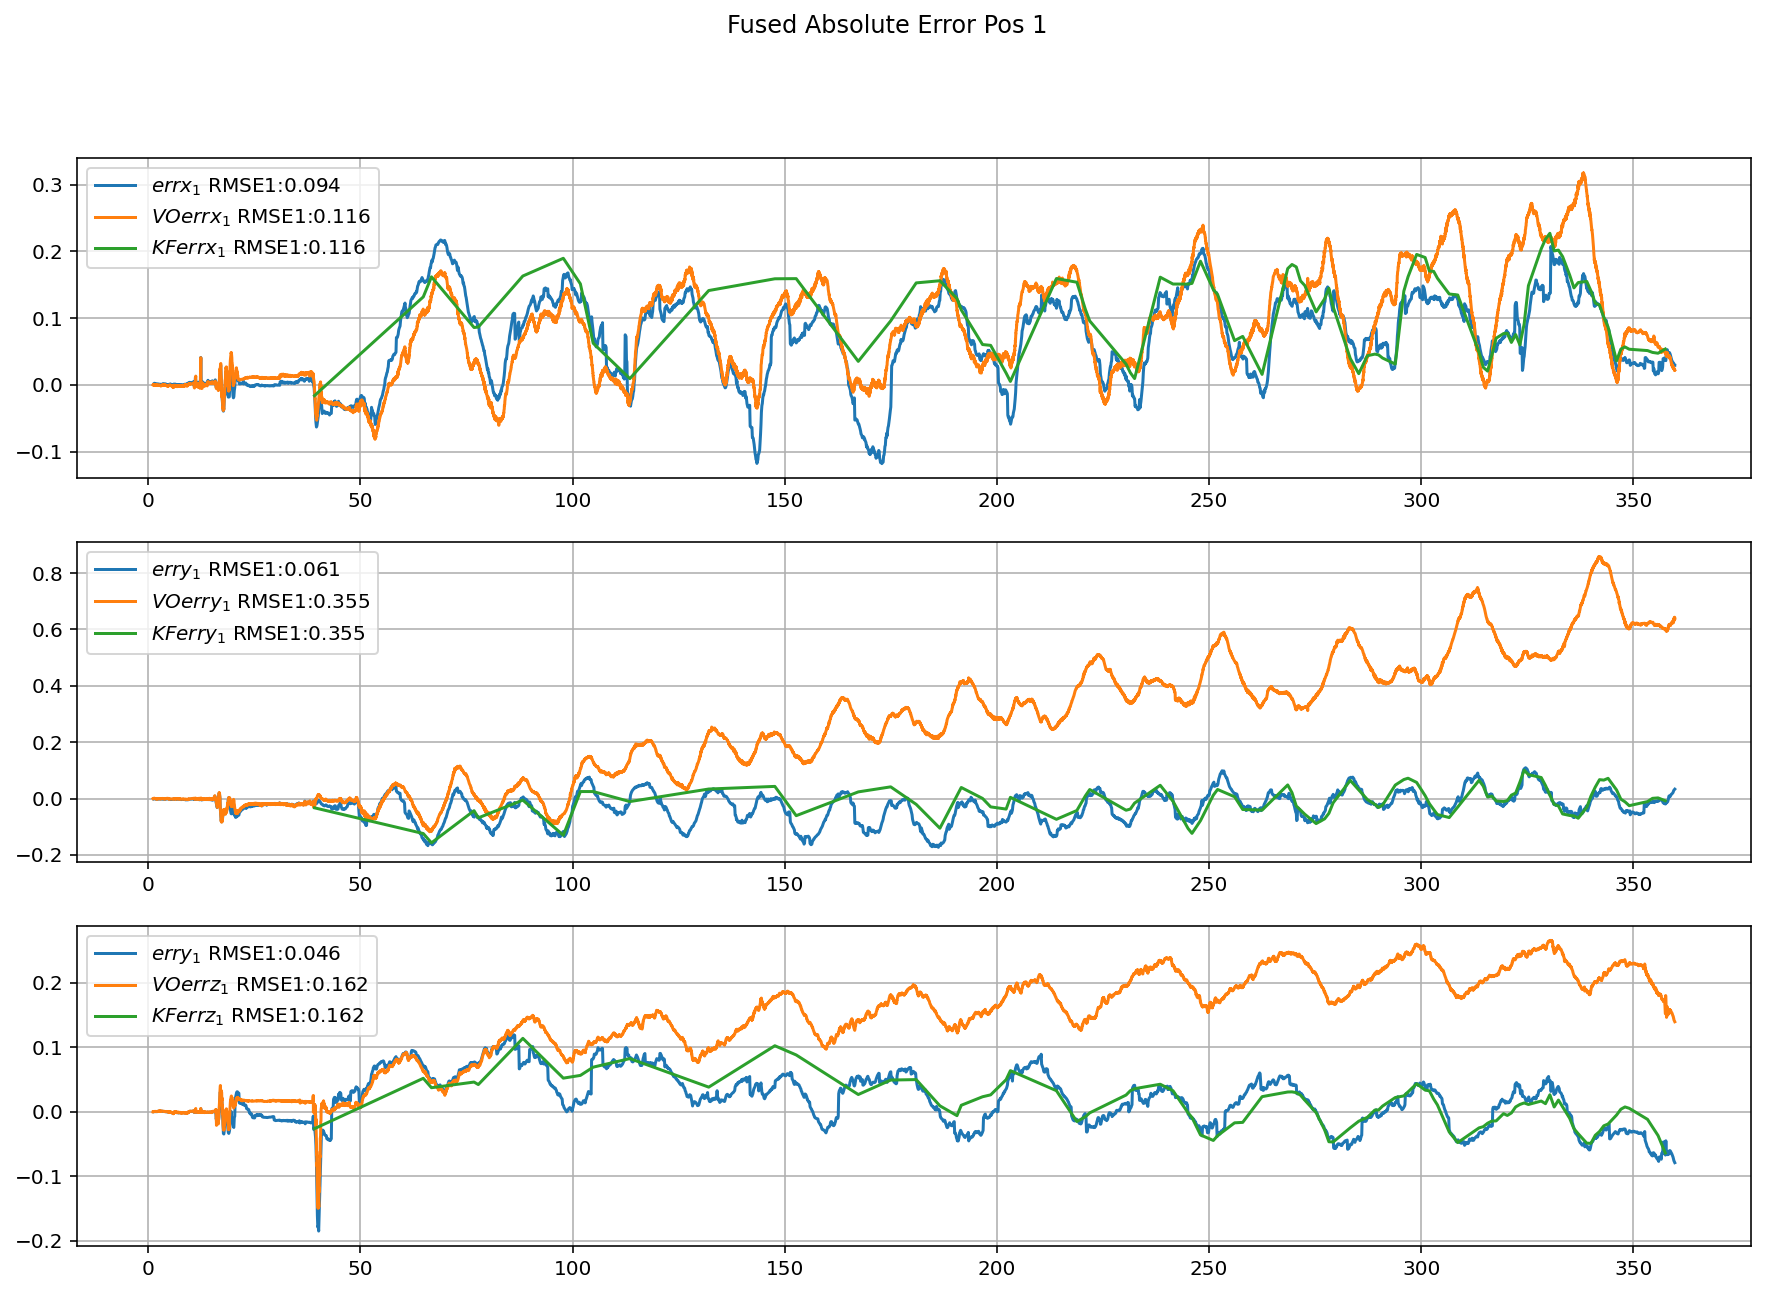

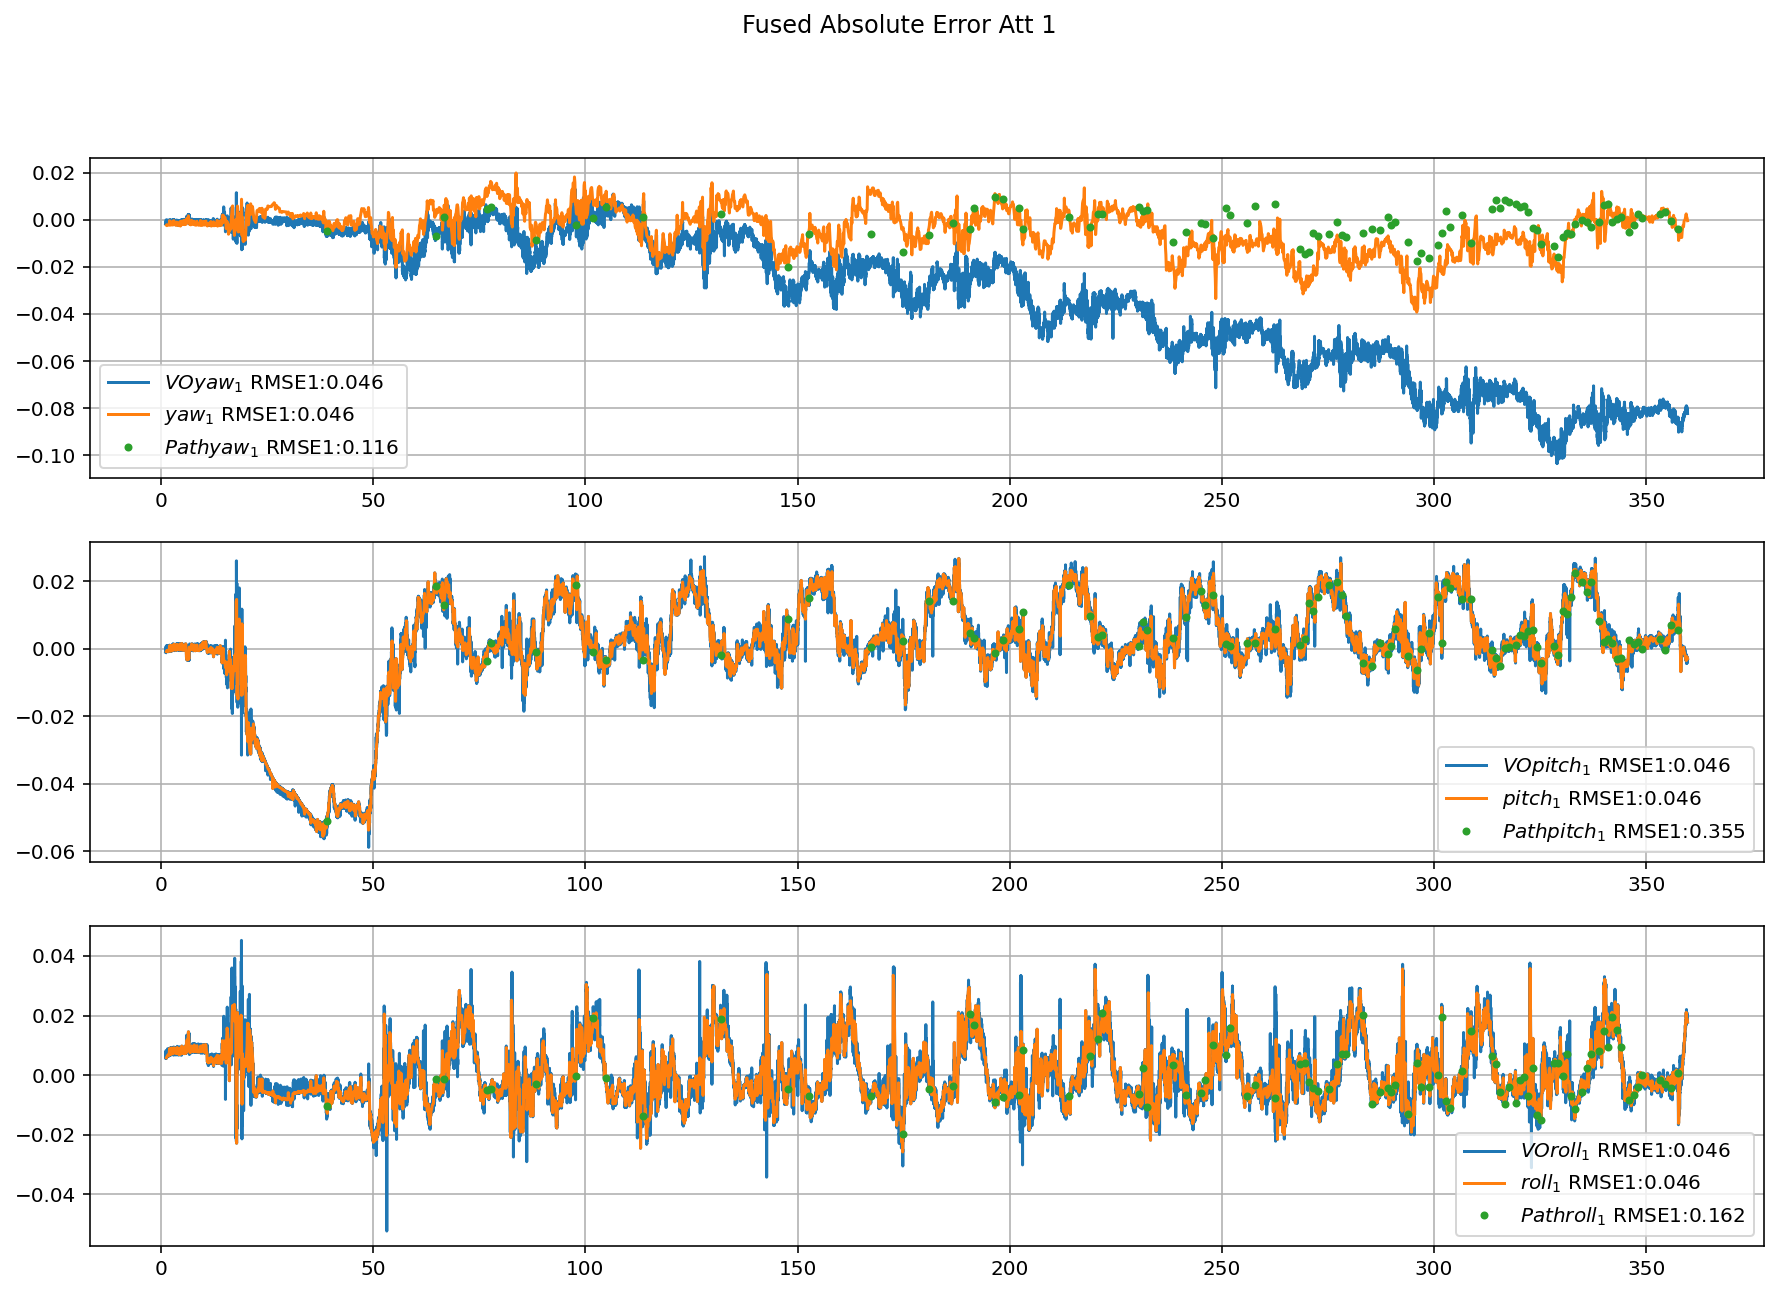

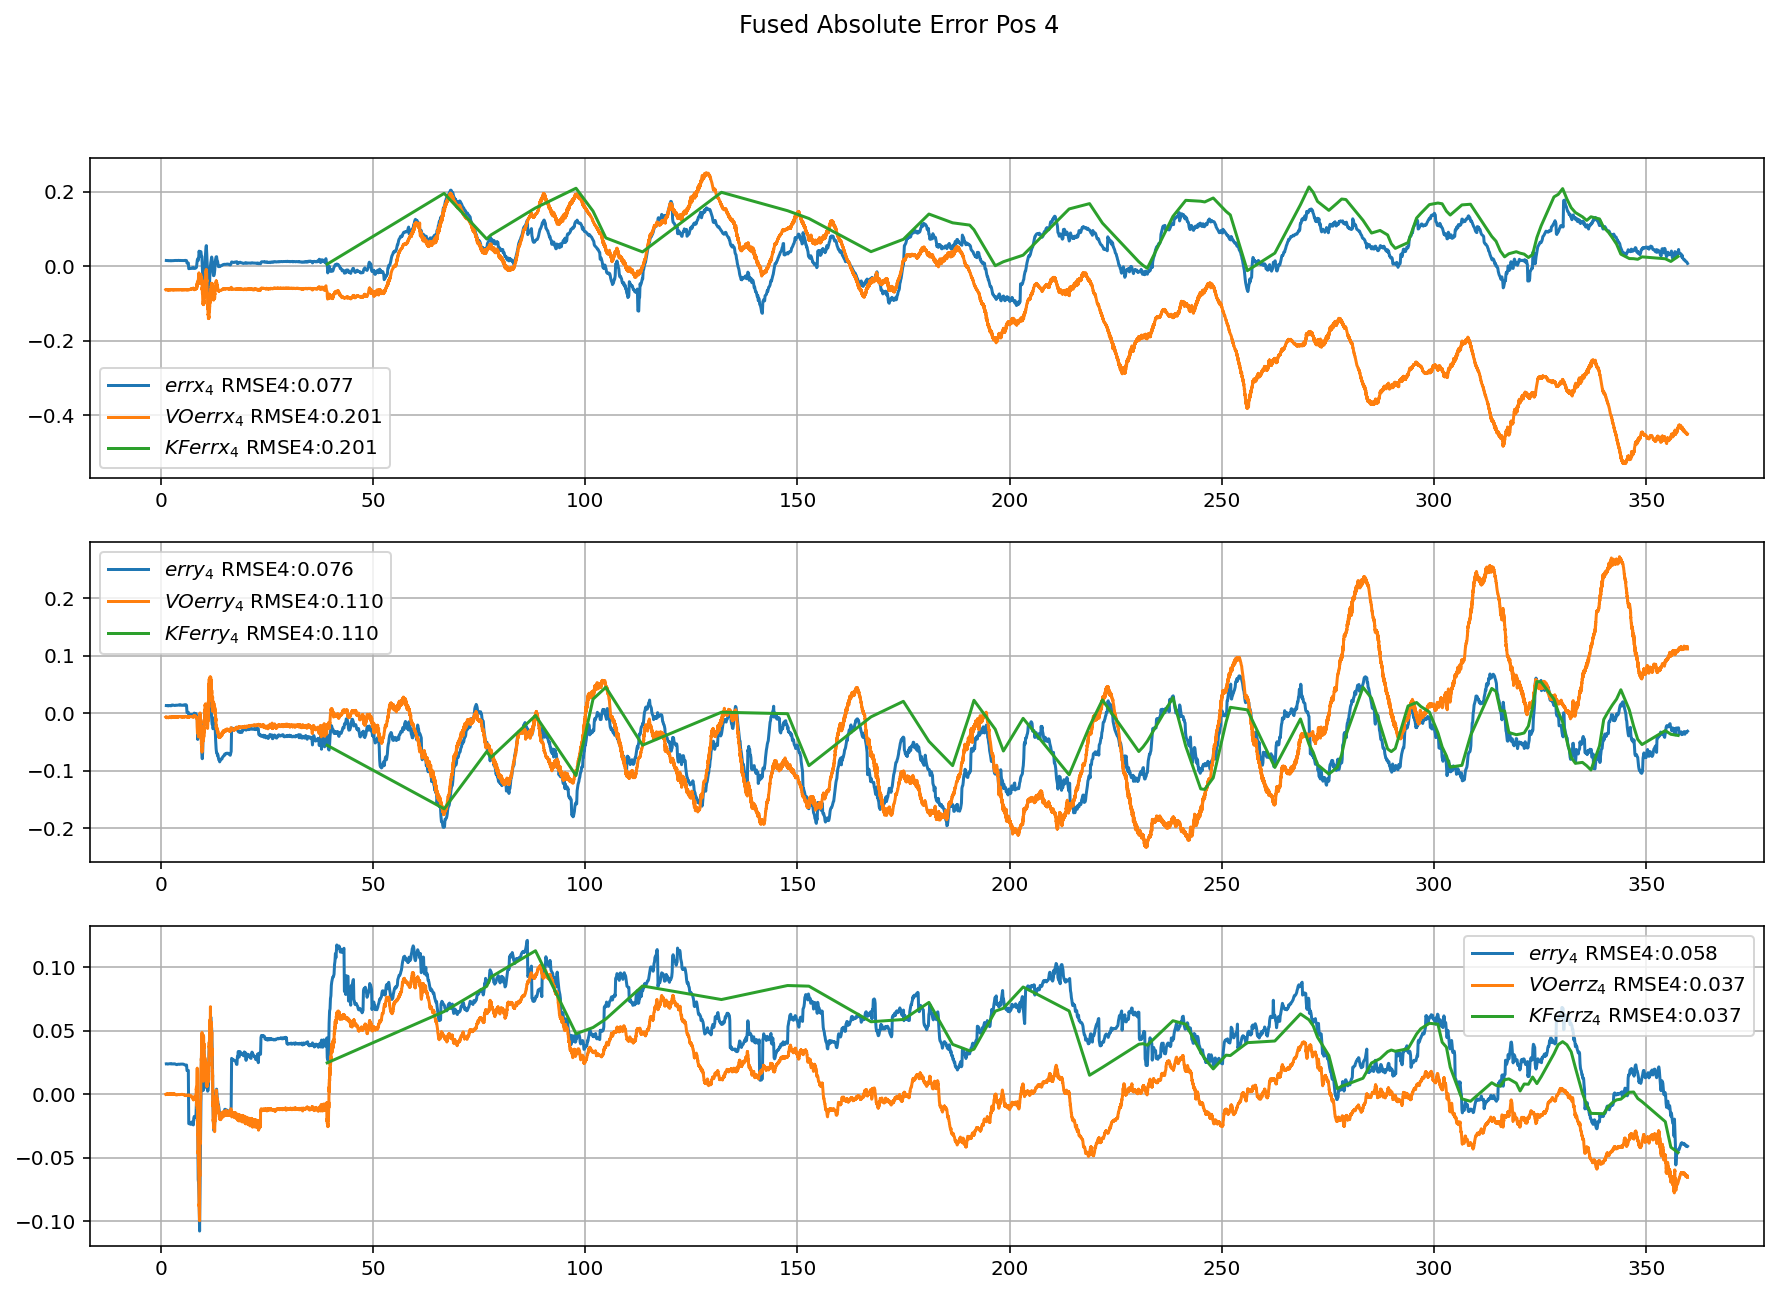

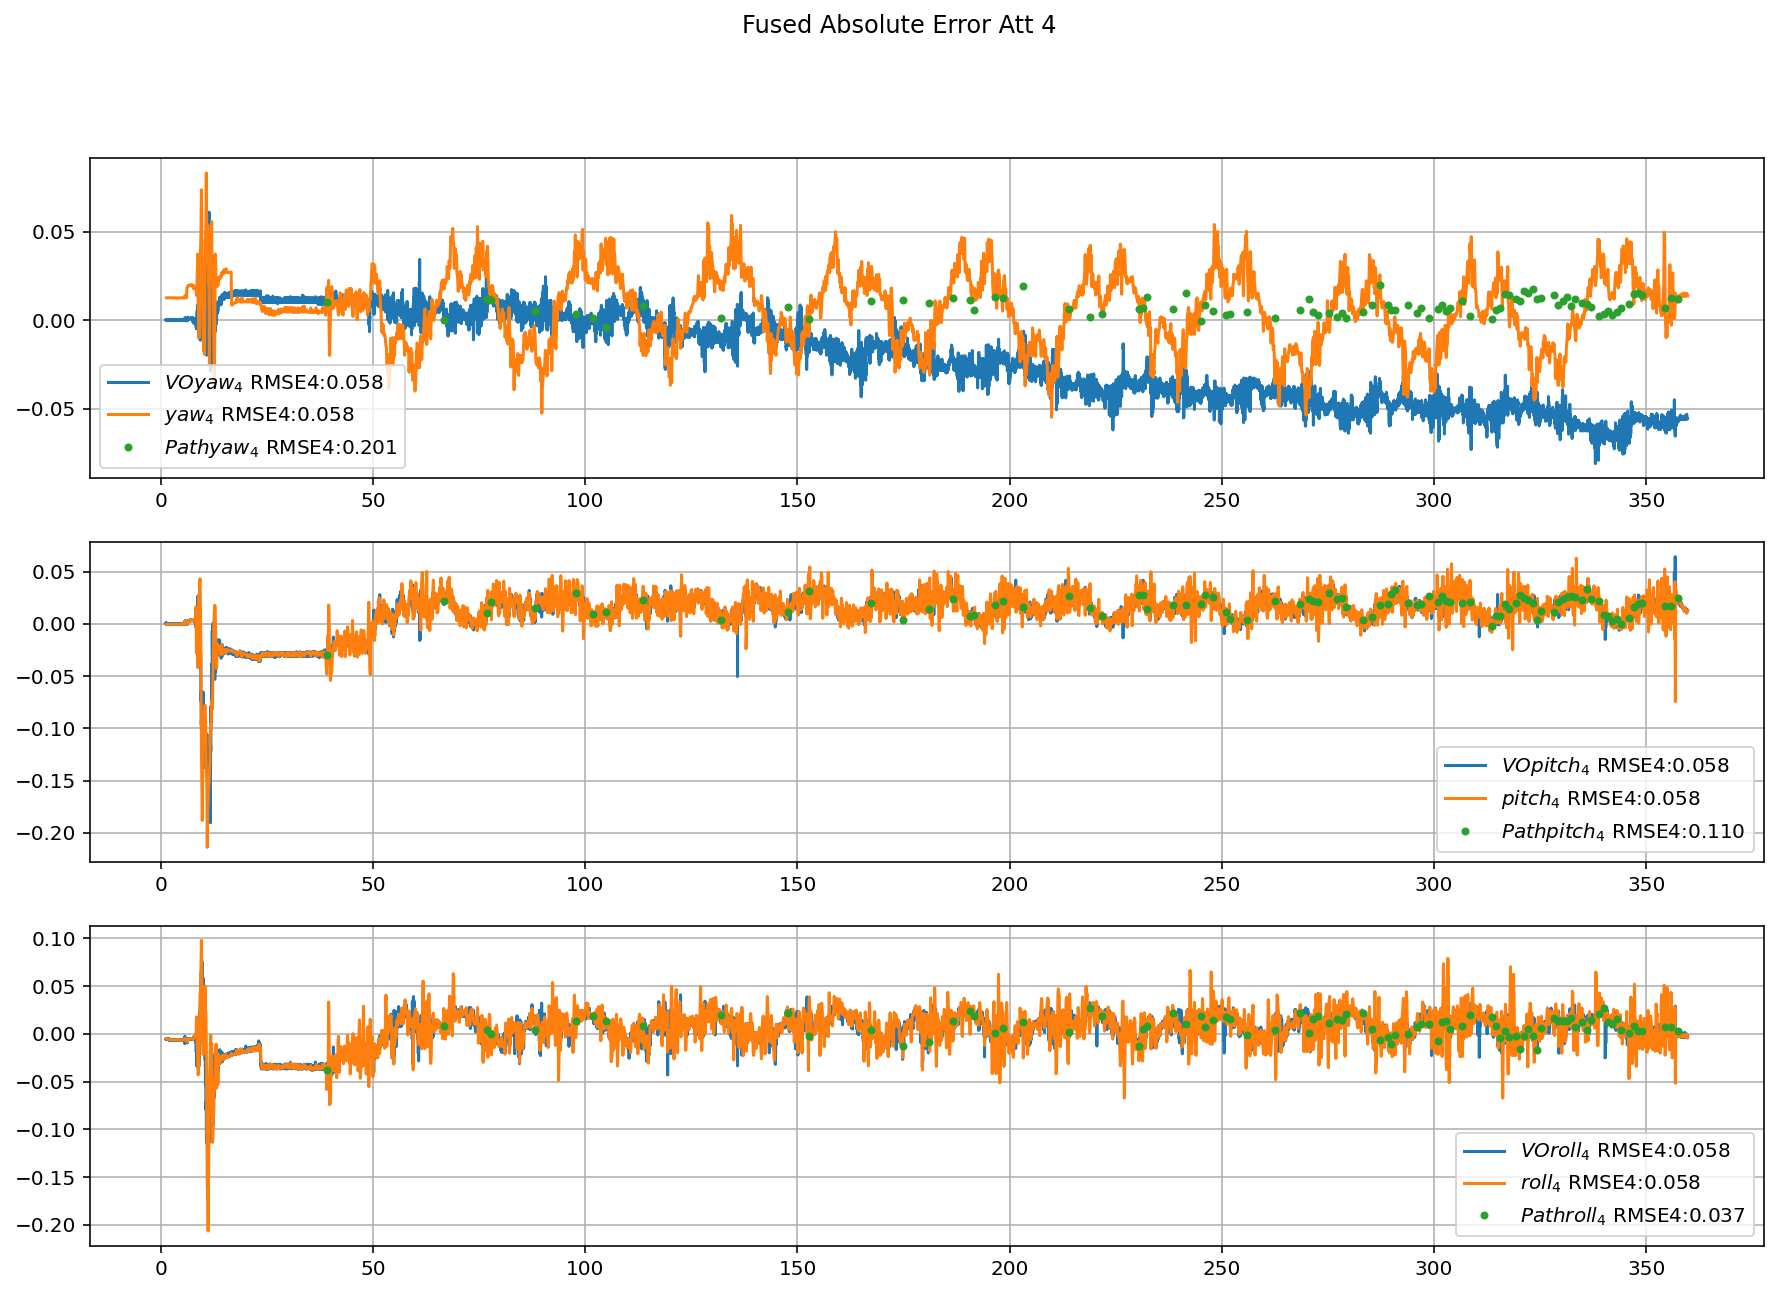

In [24]:
plt.close('all')
# detections = []
# loops = []
detections = [] #read_detections_6d(bag, t0, "/swarm_drones/node_detected_6d")
loops = [] #read_loops(bag, t0, "/swarm_loop/loop_connection")
#plot_fused(poses, poses_fused, poses_vo, poses_path, loops, detections, nodes, use_offline=False, figsize=(10,10), id_map={1:1, 4:2})
plot_fused_err(poses, poses_fused, poses_vo, poses_path, nodes ,show=True,main_id=main_id, outlier_thres=10)
#lot_relative_pose_err(poses, poses_fused, poses_vo, 1, [4], figsize=(15, 10), outlier_thres=10)
#plt.show()

Outlier rate 0.00% total loops 292 inter_loops 162 outlier_num 0
Pos cov 1.6e-03, 1.2e-02, 2.4e-03
Yaw cov 1.1e-04
Pos std 4.0e-02, 1.1e-01, 4.9e-02
Yaw std 1.1e-02


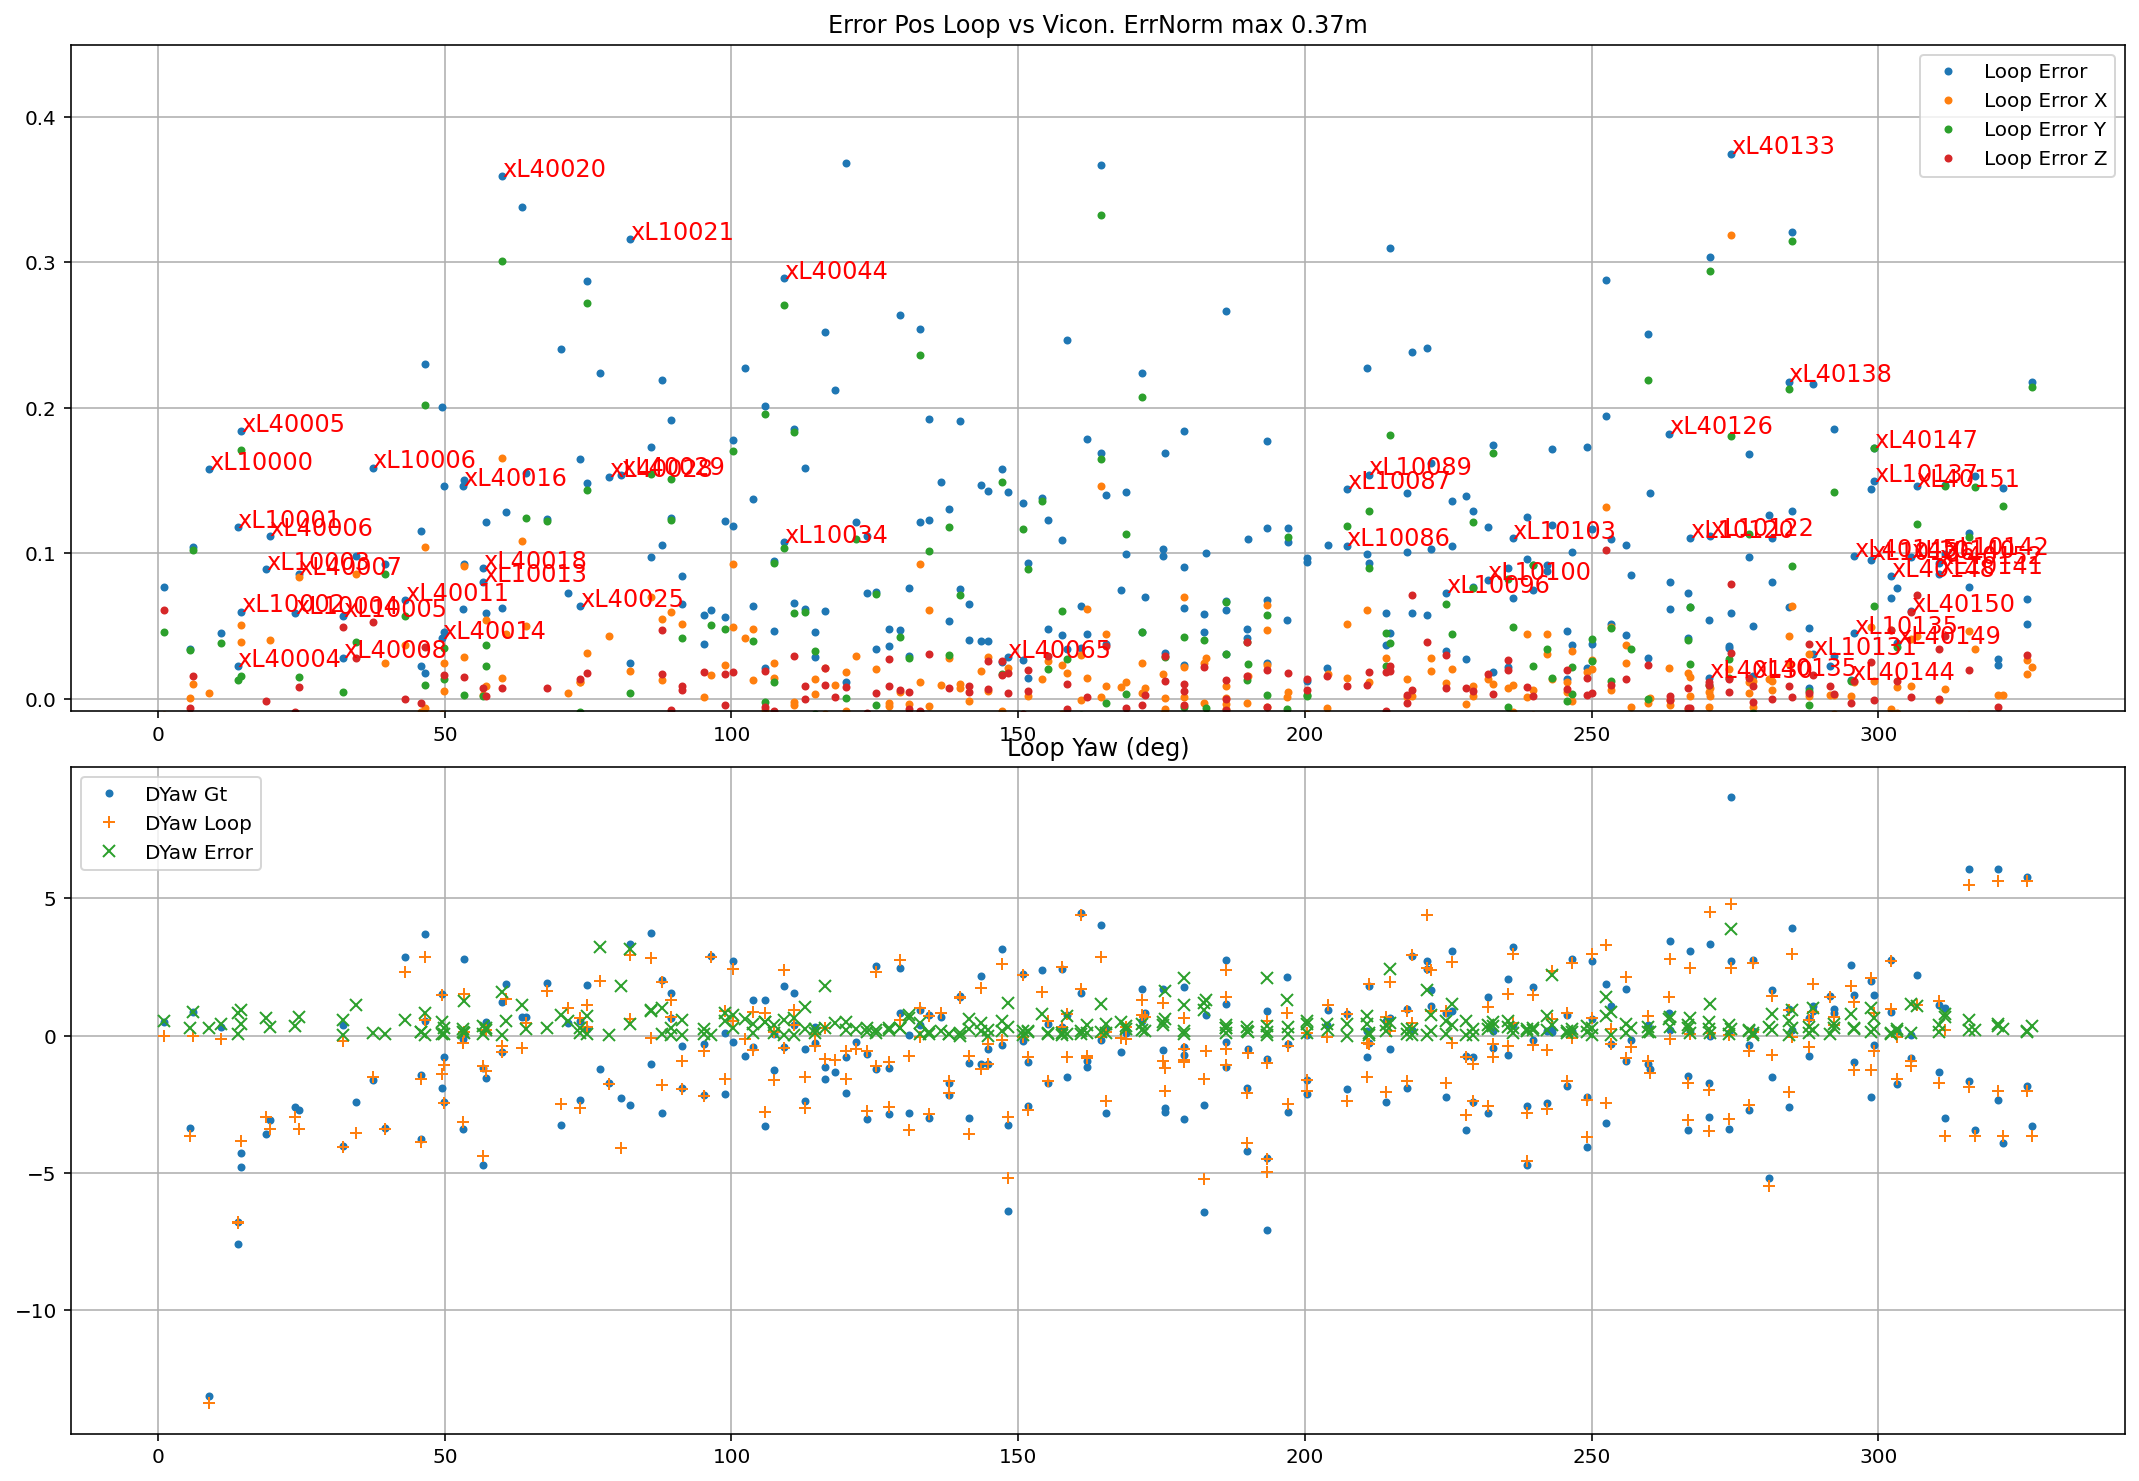

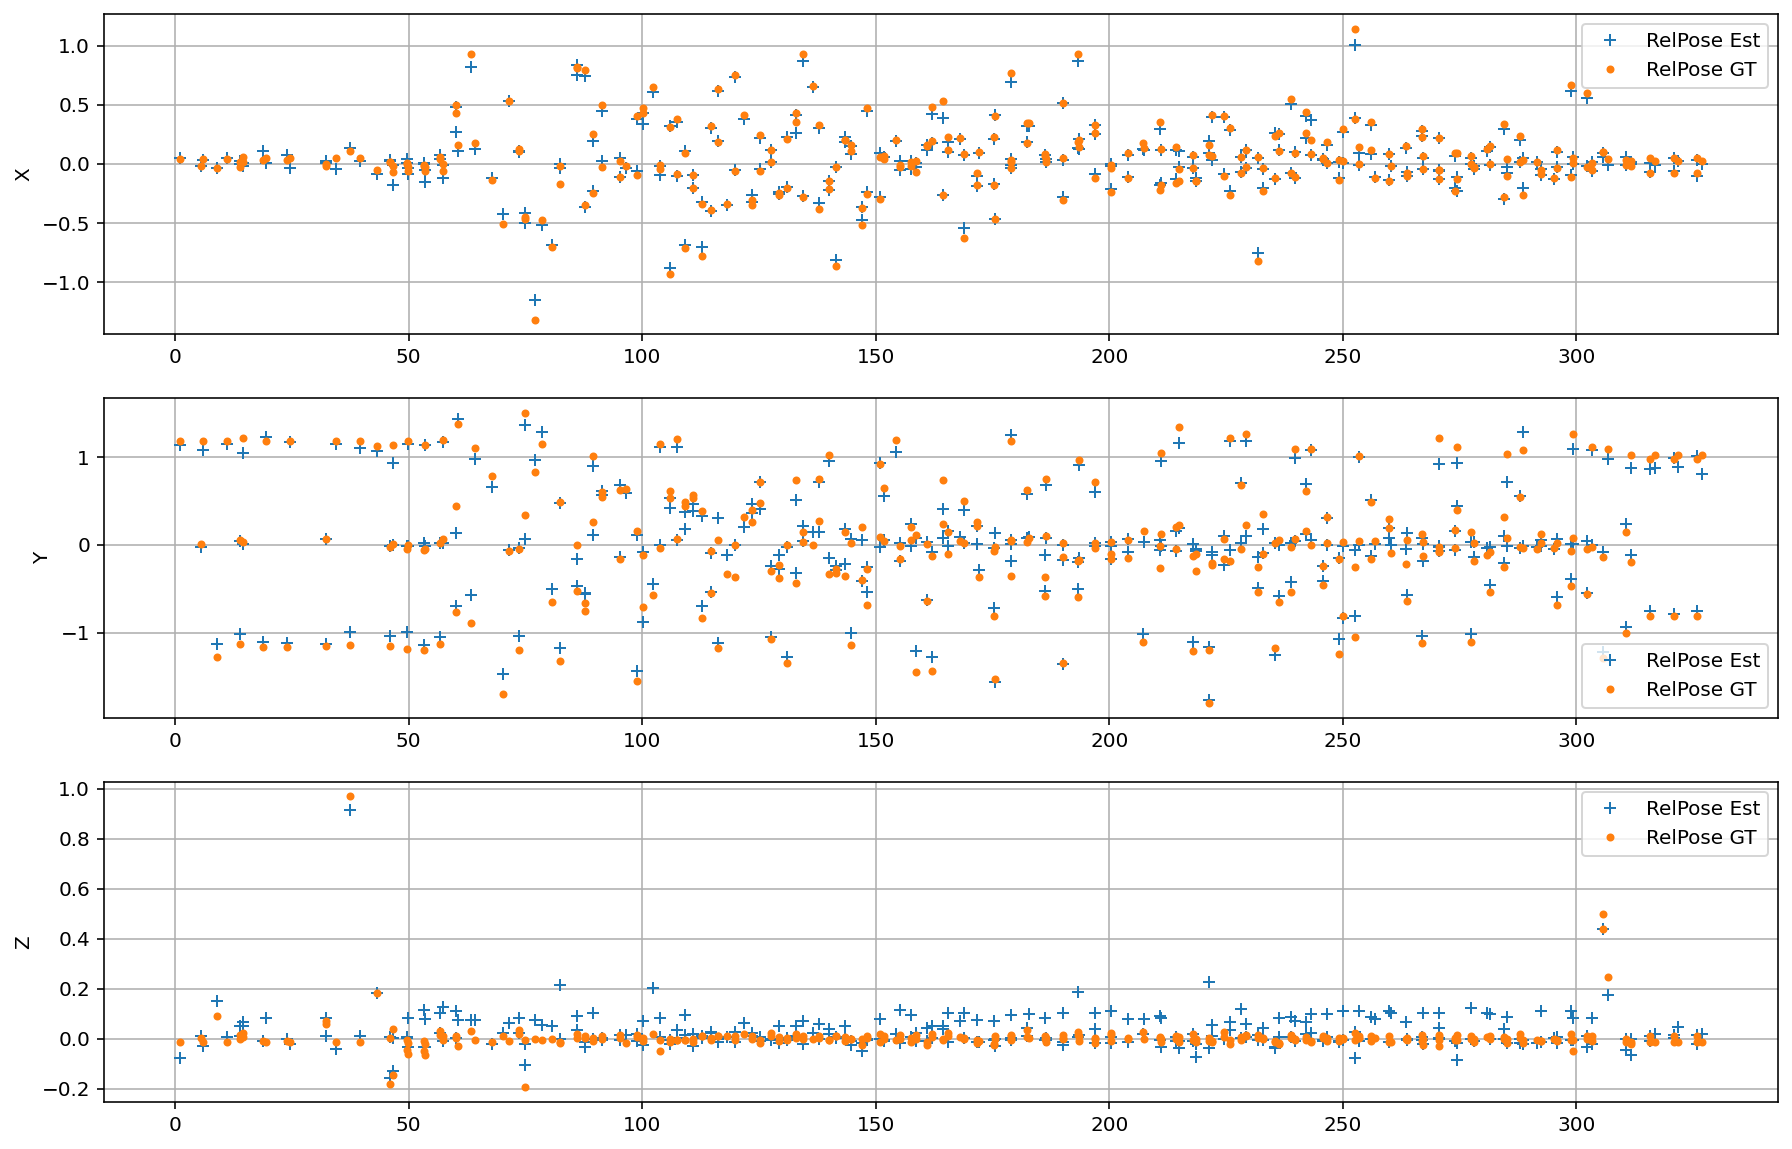

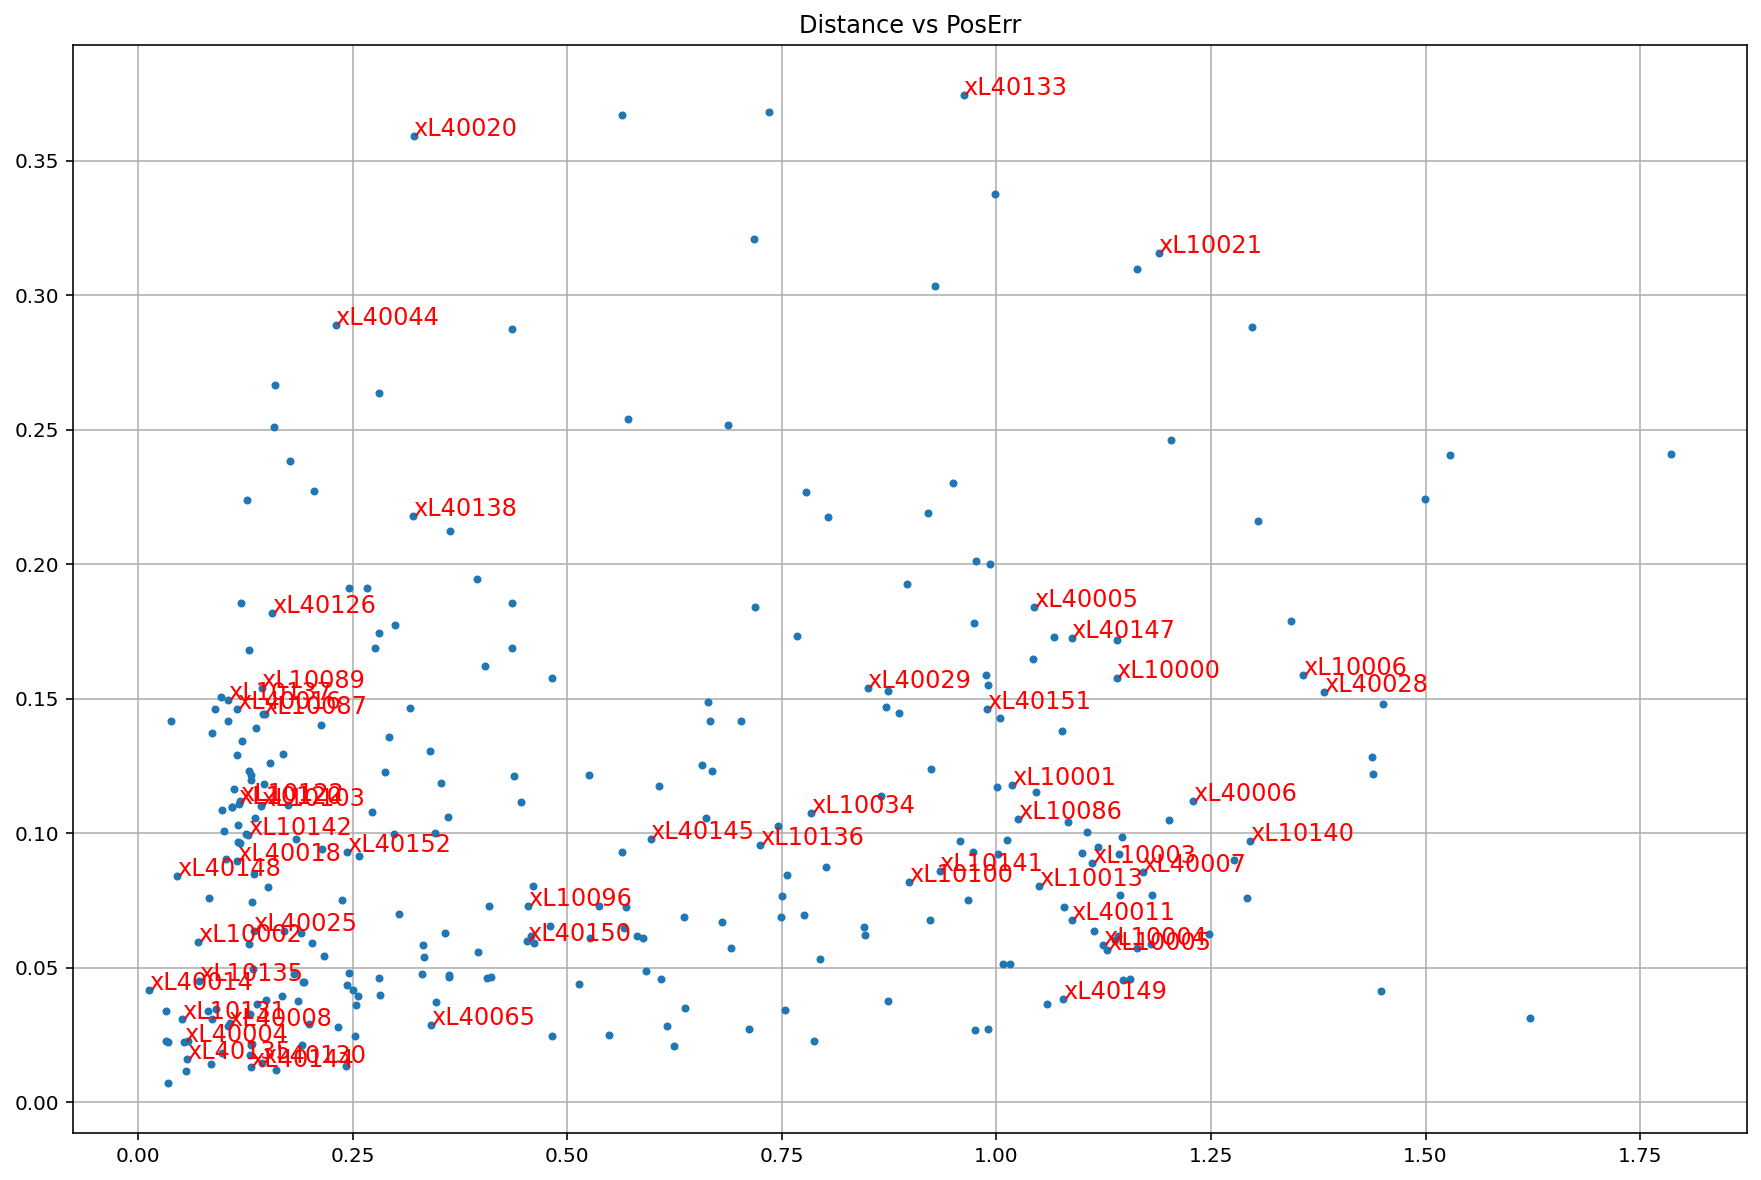

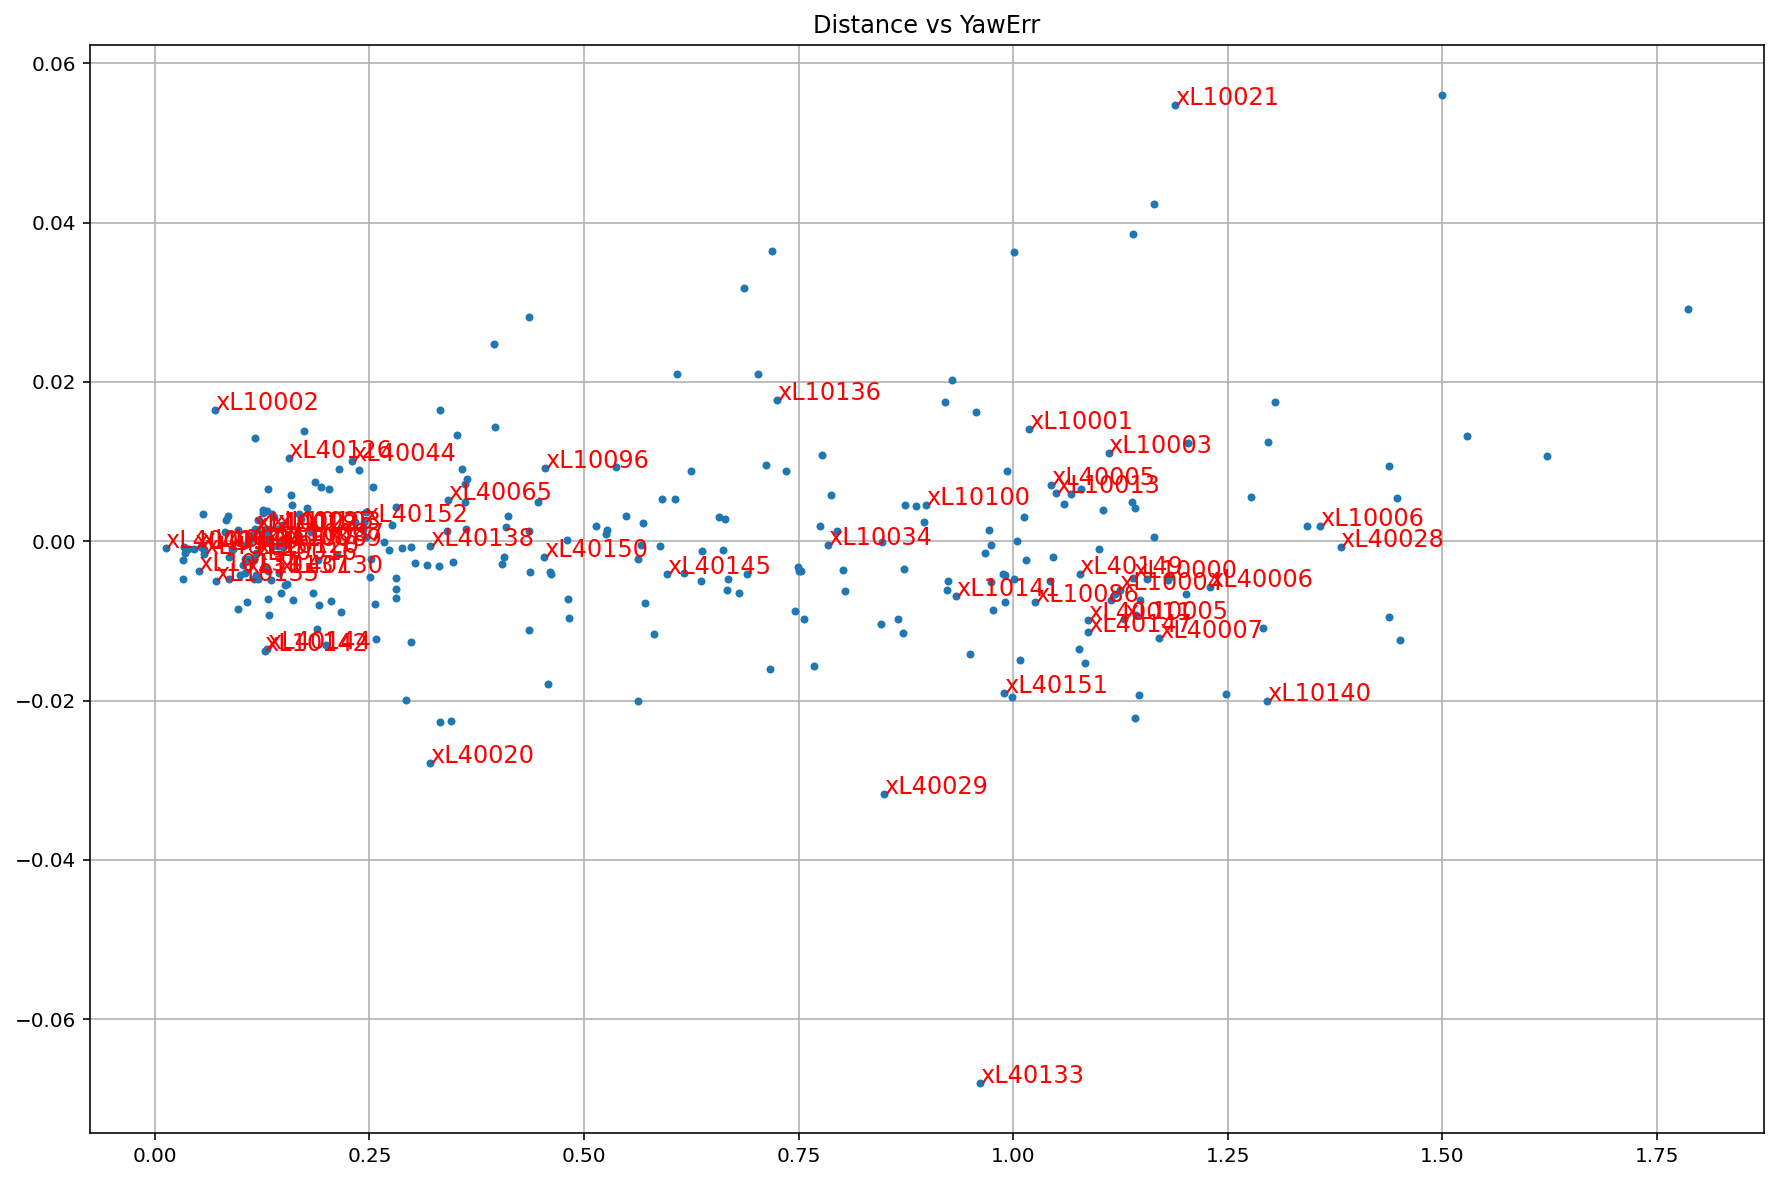

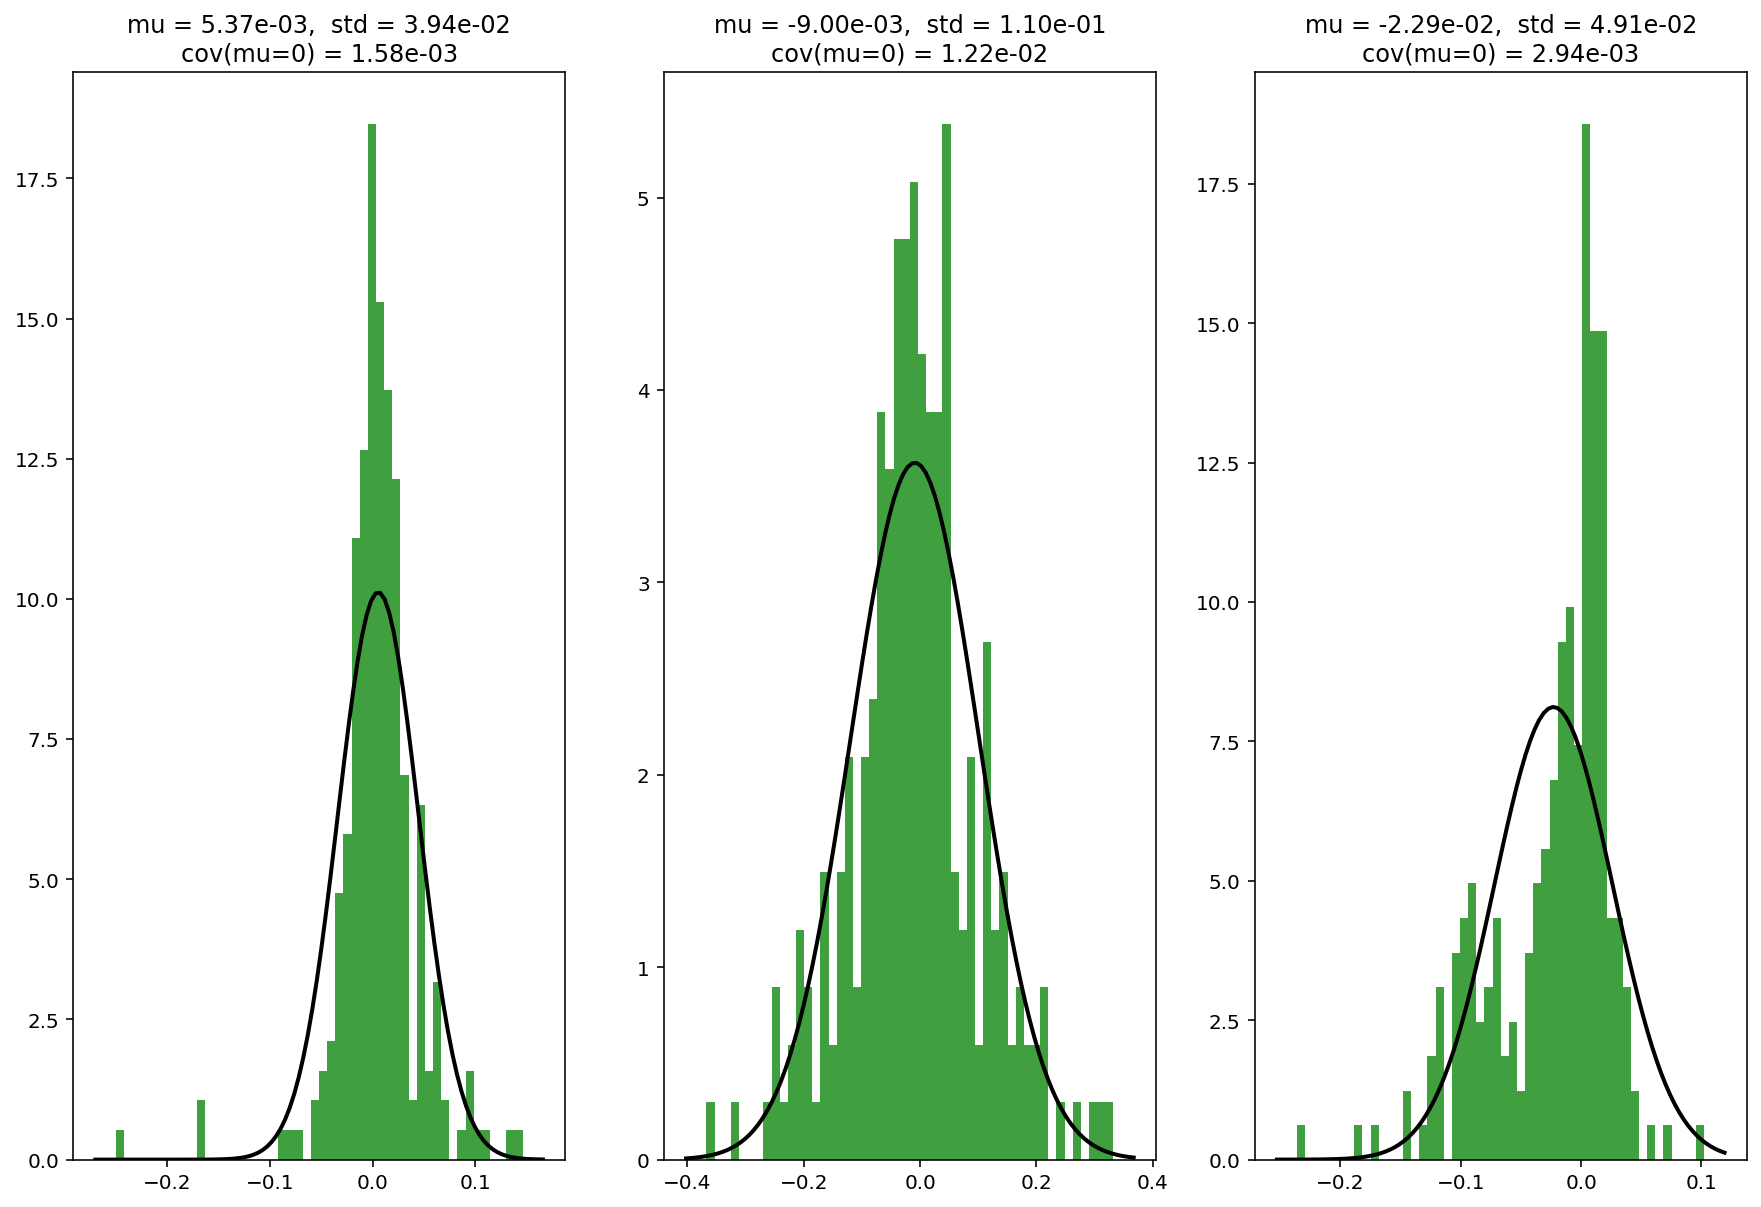

In [5]:
plt.close("all")
inliers = read_loop_inliers(bag, "/swarm_drones/loop_inliers")
loops = read_loops(bag, t0, "/swarm_loop/loop_connection")
loops_error = plot_loops_error(poses, loops, good_loop_id=inliers[-1], outlier_show_thres=0.4)
#_= debugging_pcm("/home/xuhao/bags/swarm_raw_parallel2_2021-10-18_17-09/outputs/fuse_all/swarm1/", inliers[-1], loops_error, 1.635)

Read distances from topic /swarm_drones/swarm_frame


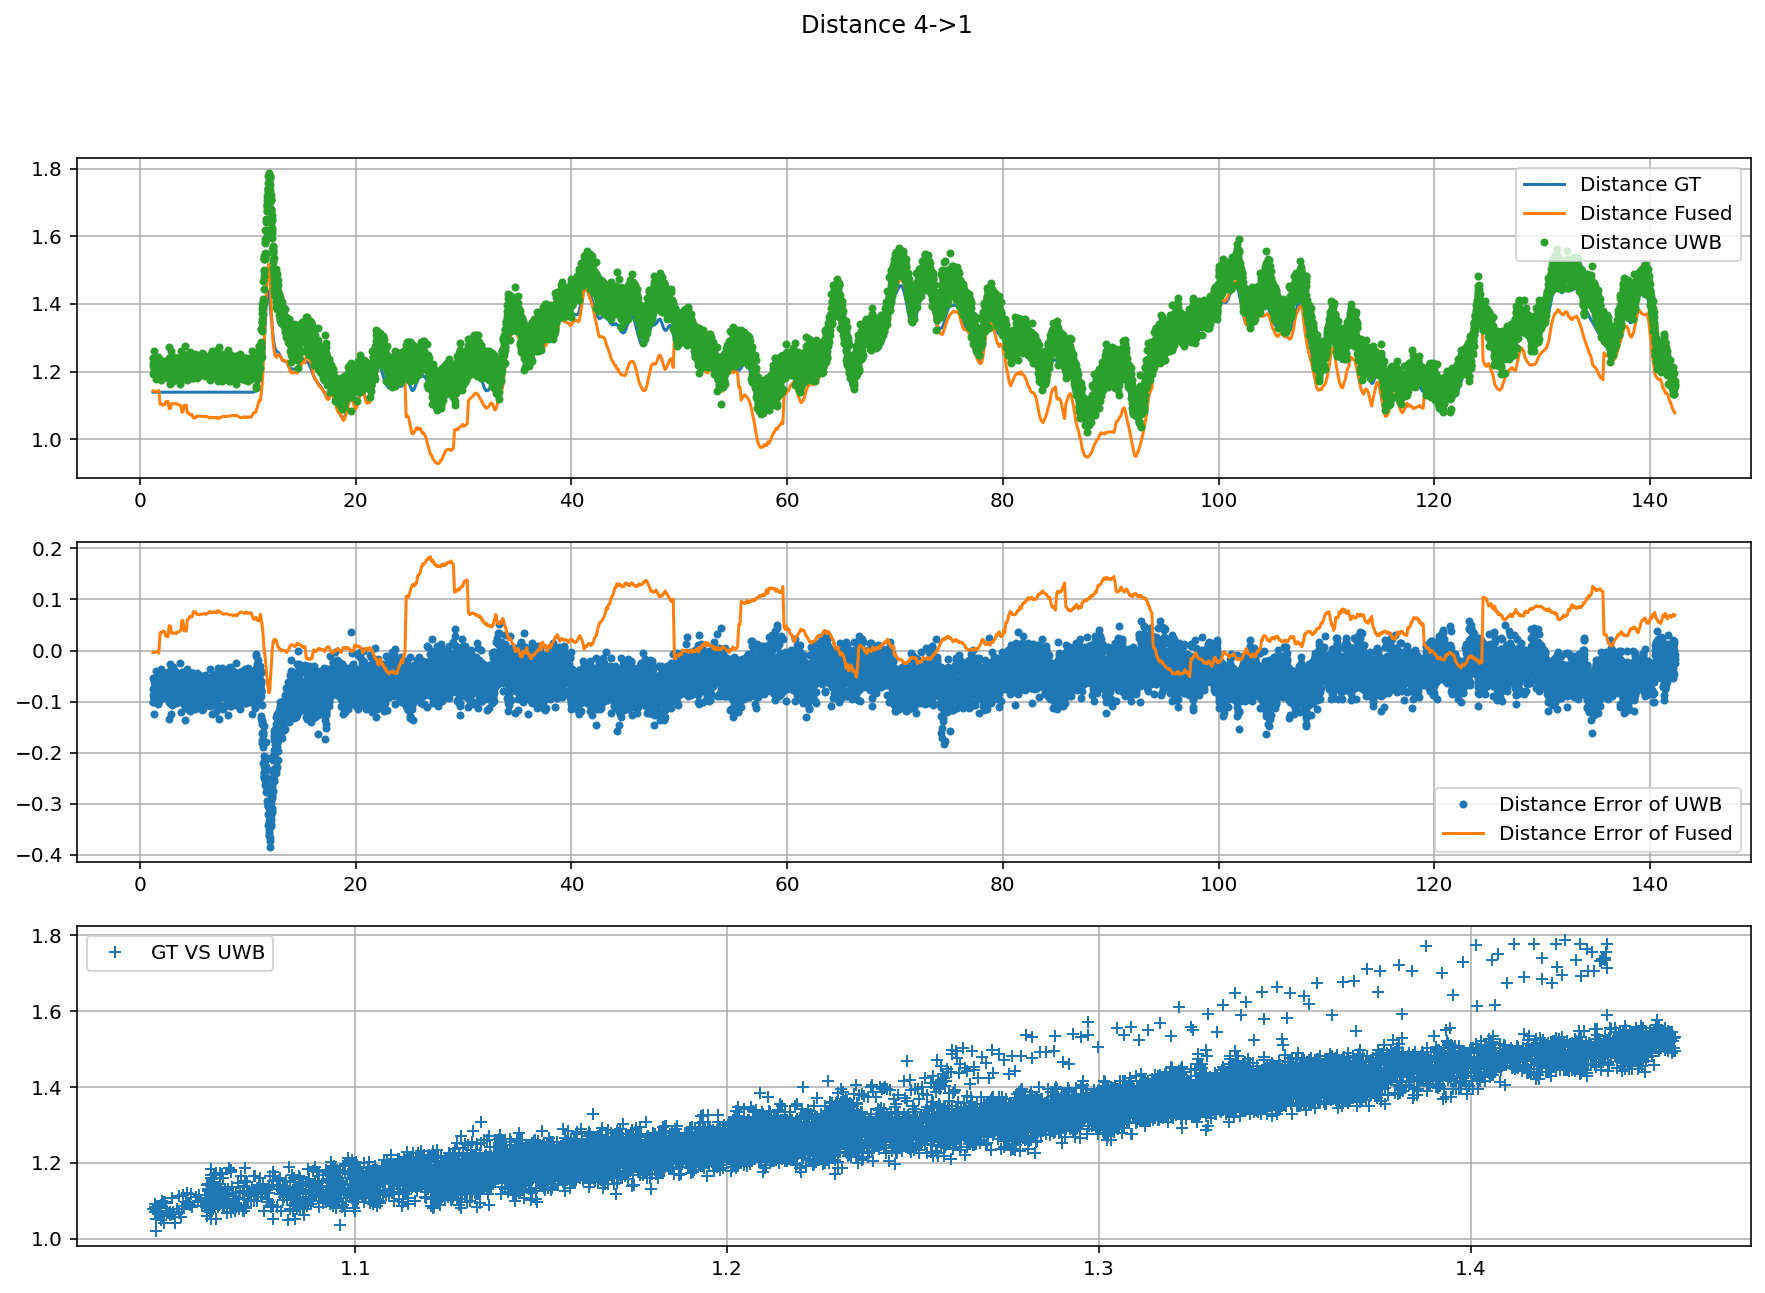

Distance 4->1 RMSE 0.06520451825318099
Fit 0.8466392689730007, 0.14620570391720963


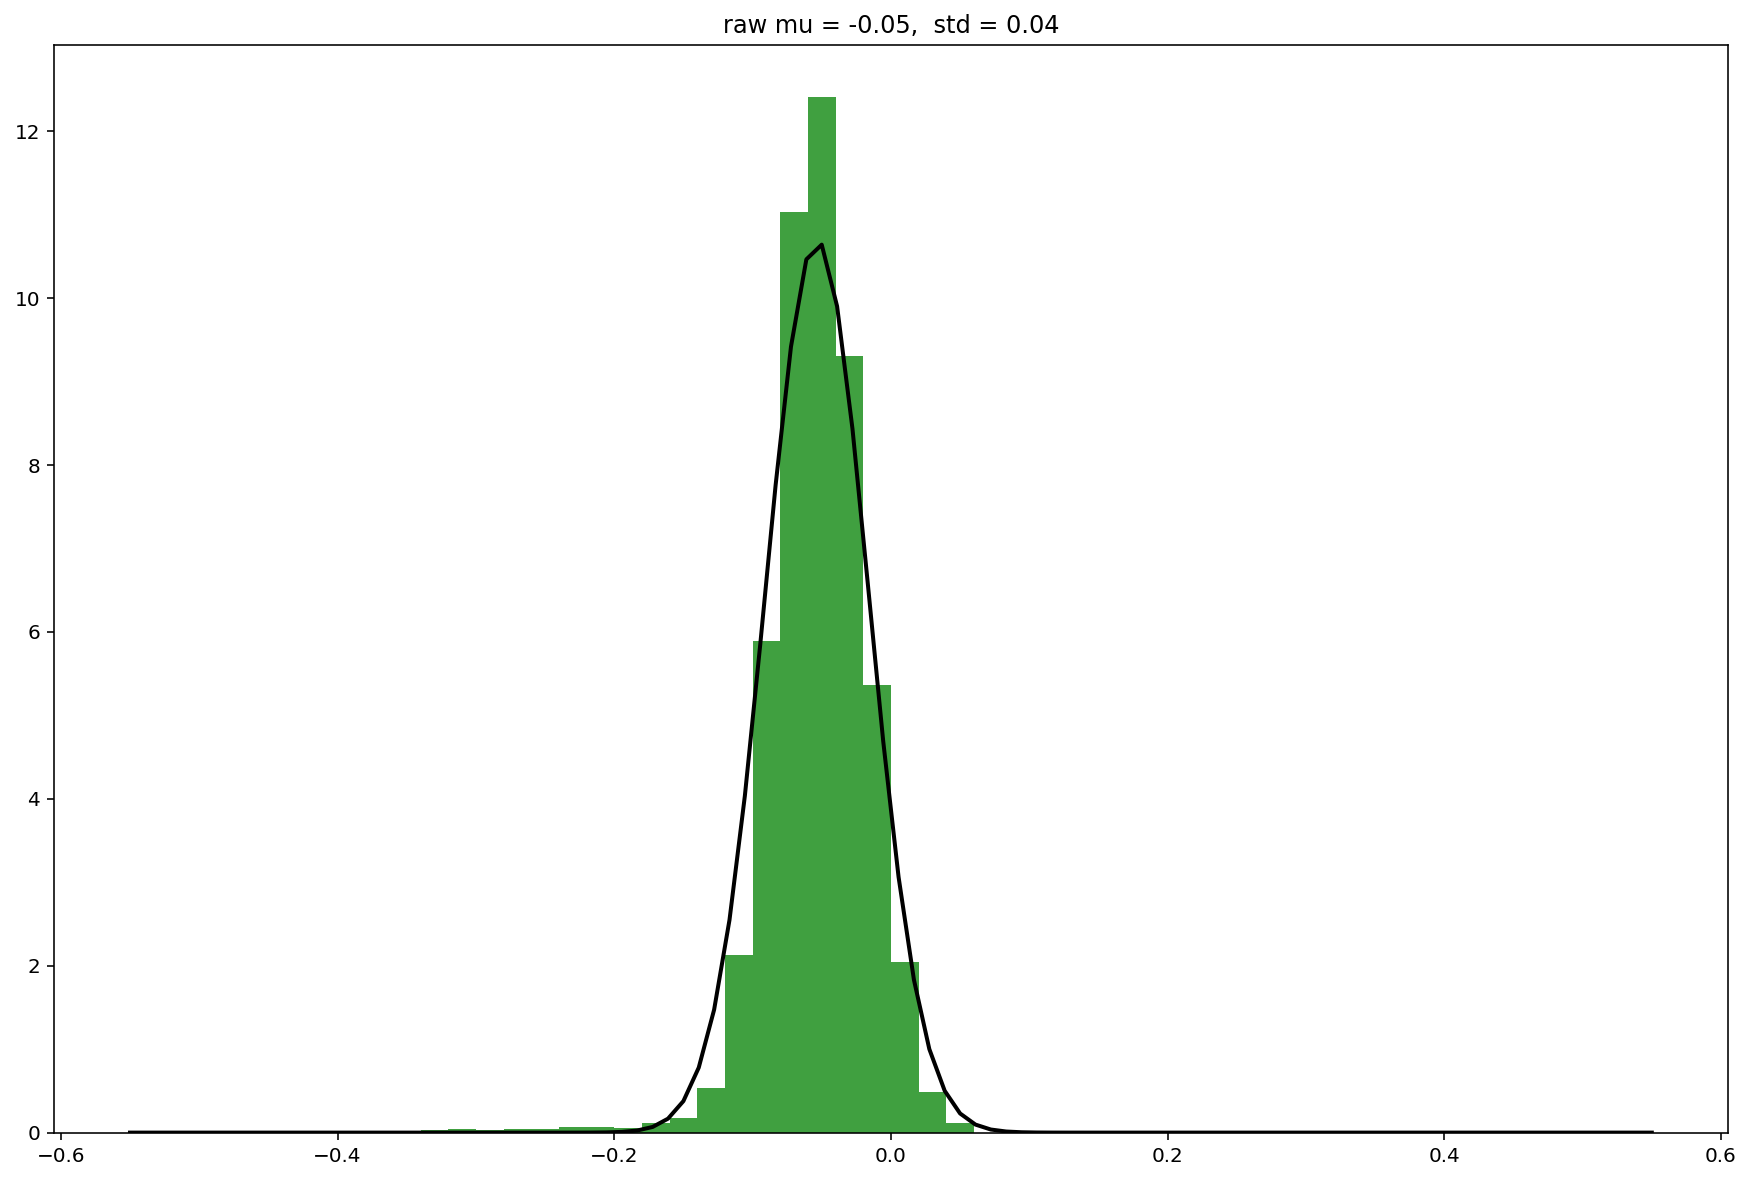

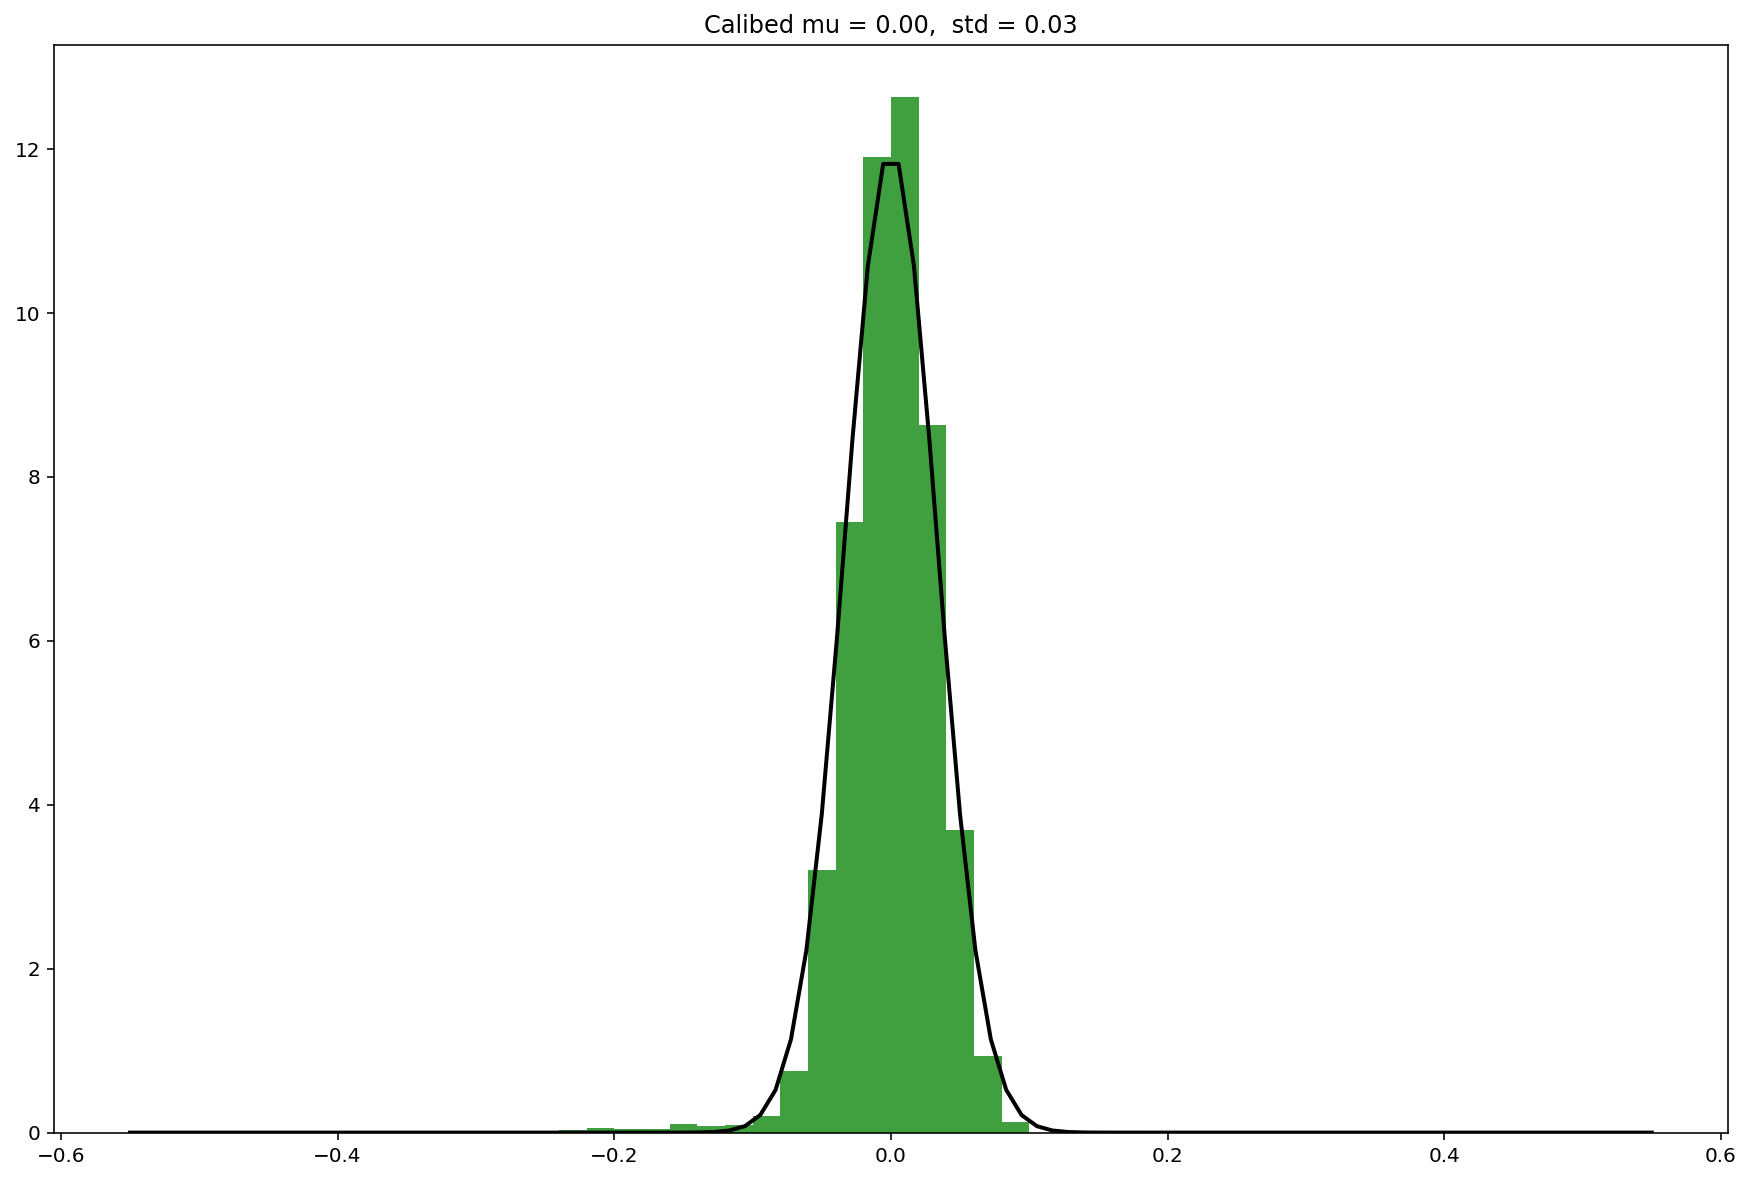

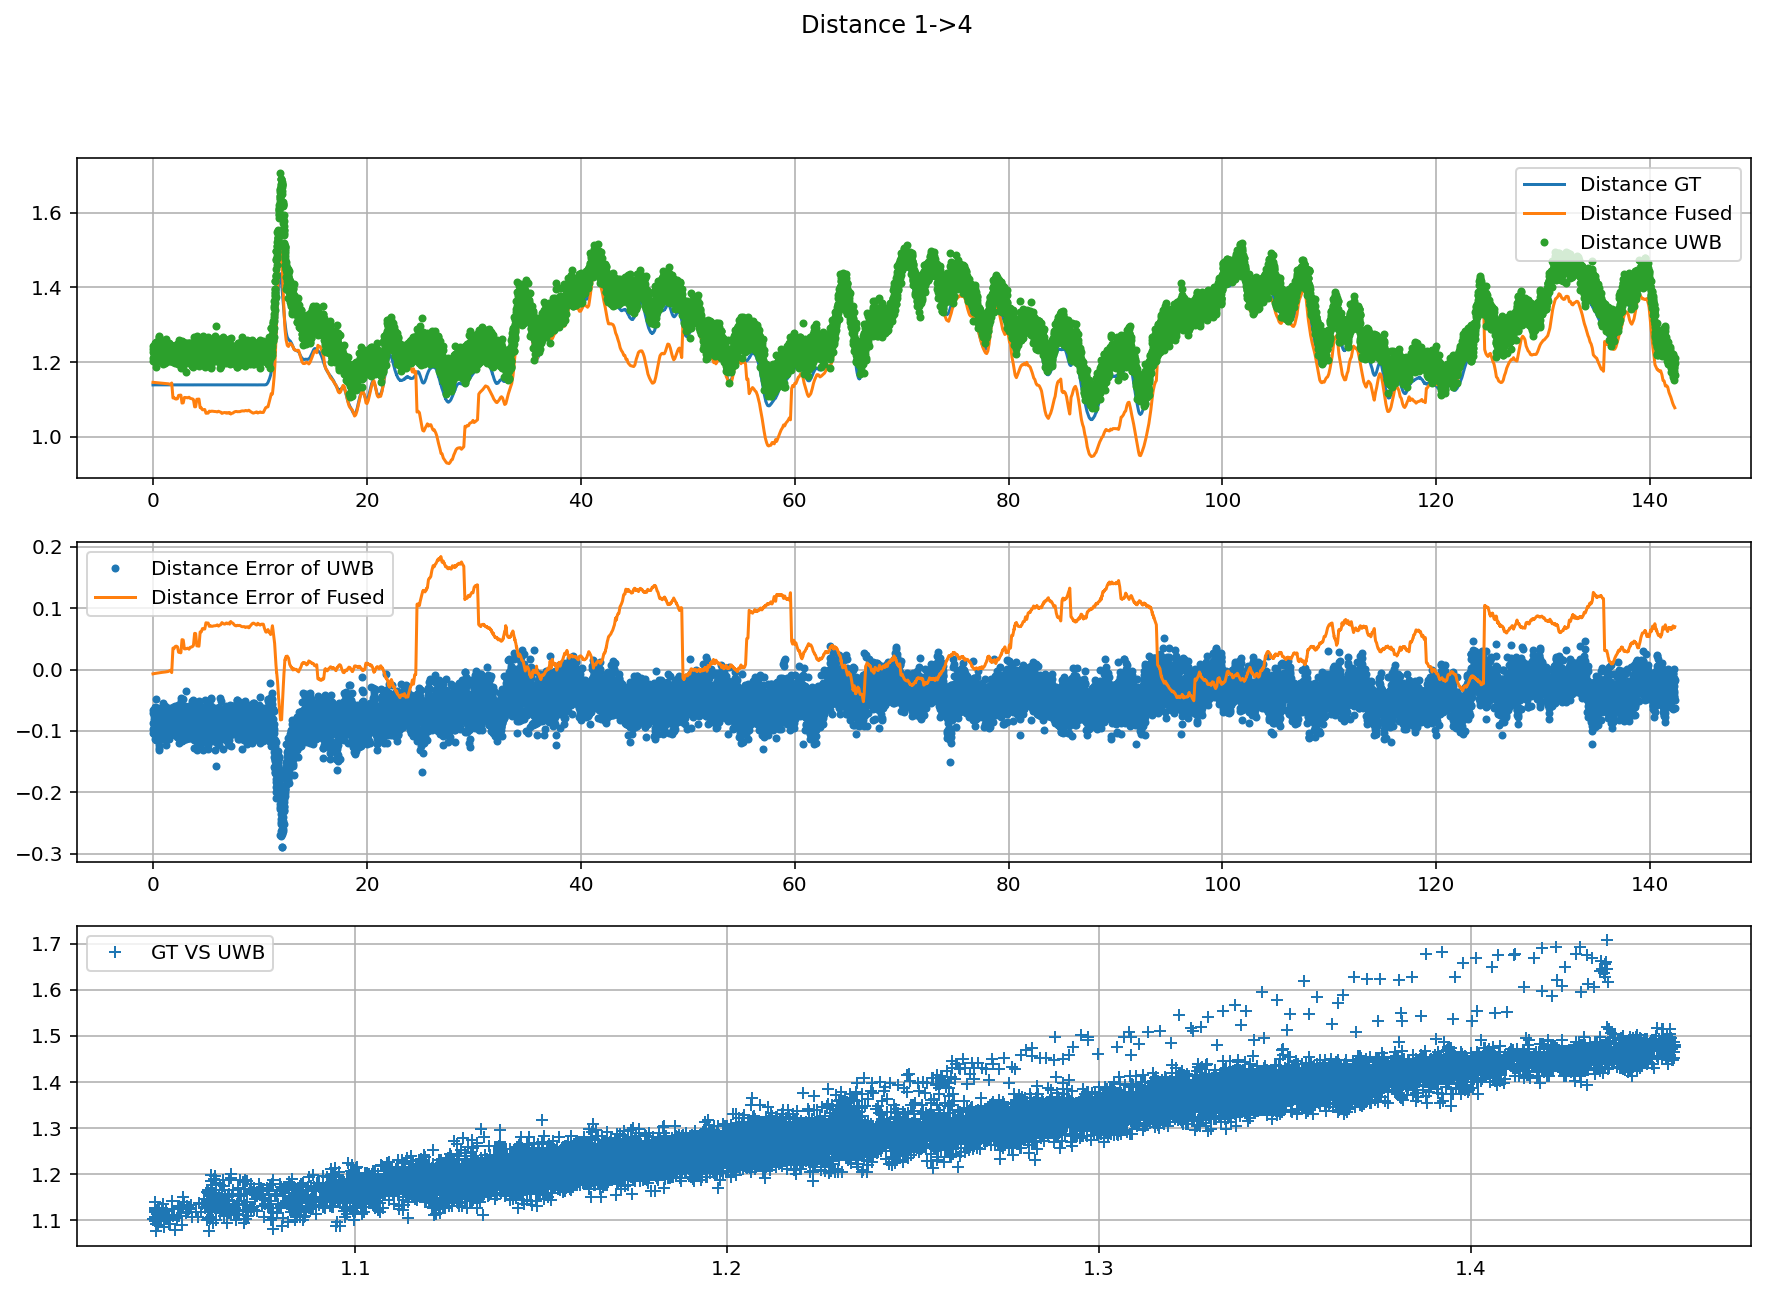

Distance 1->4 RMSE 0.060311321568587935
Fit 1.0243085342687634, -0.08227464932799301


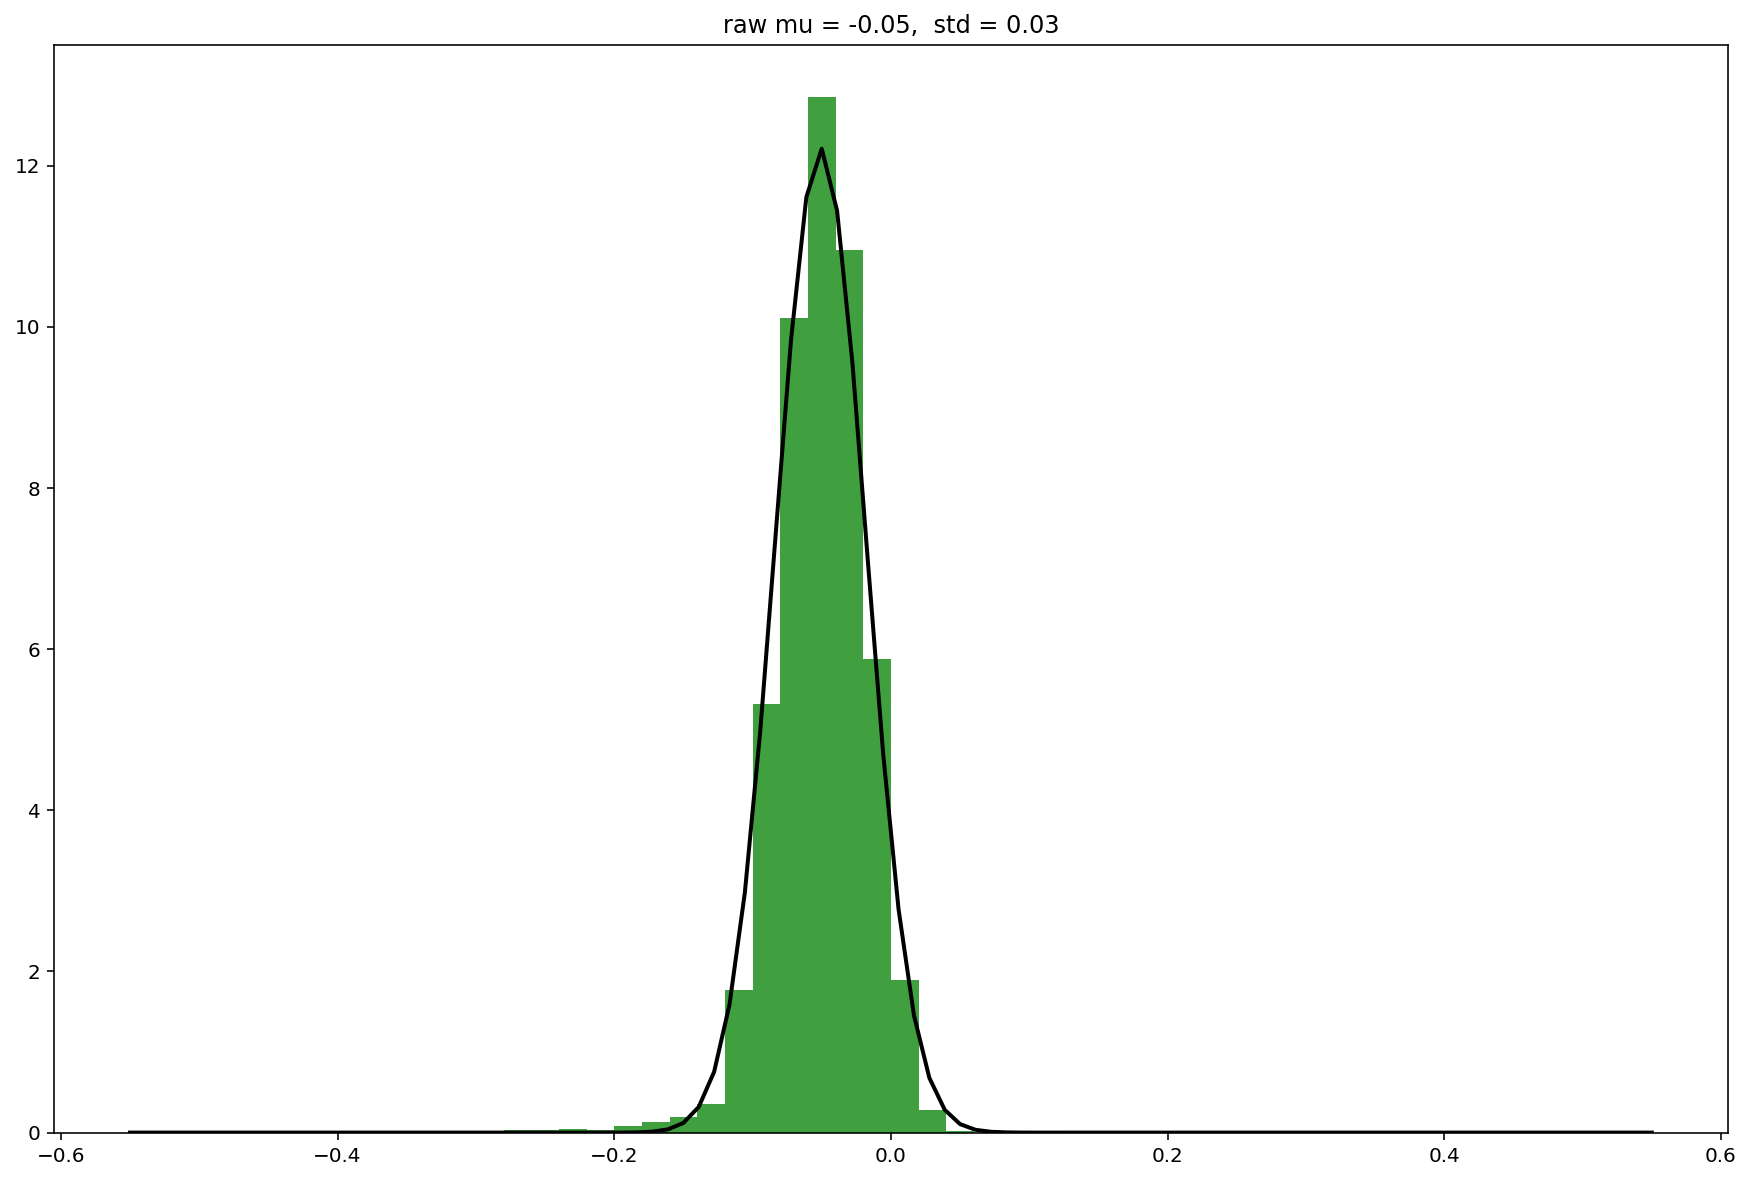

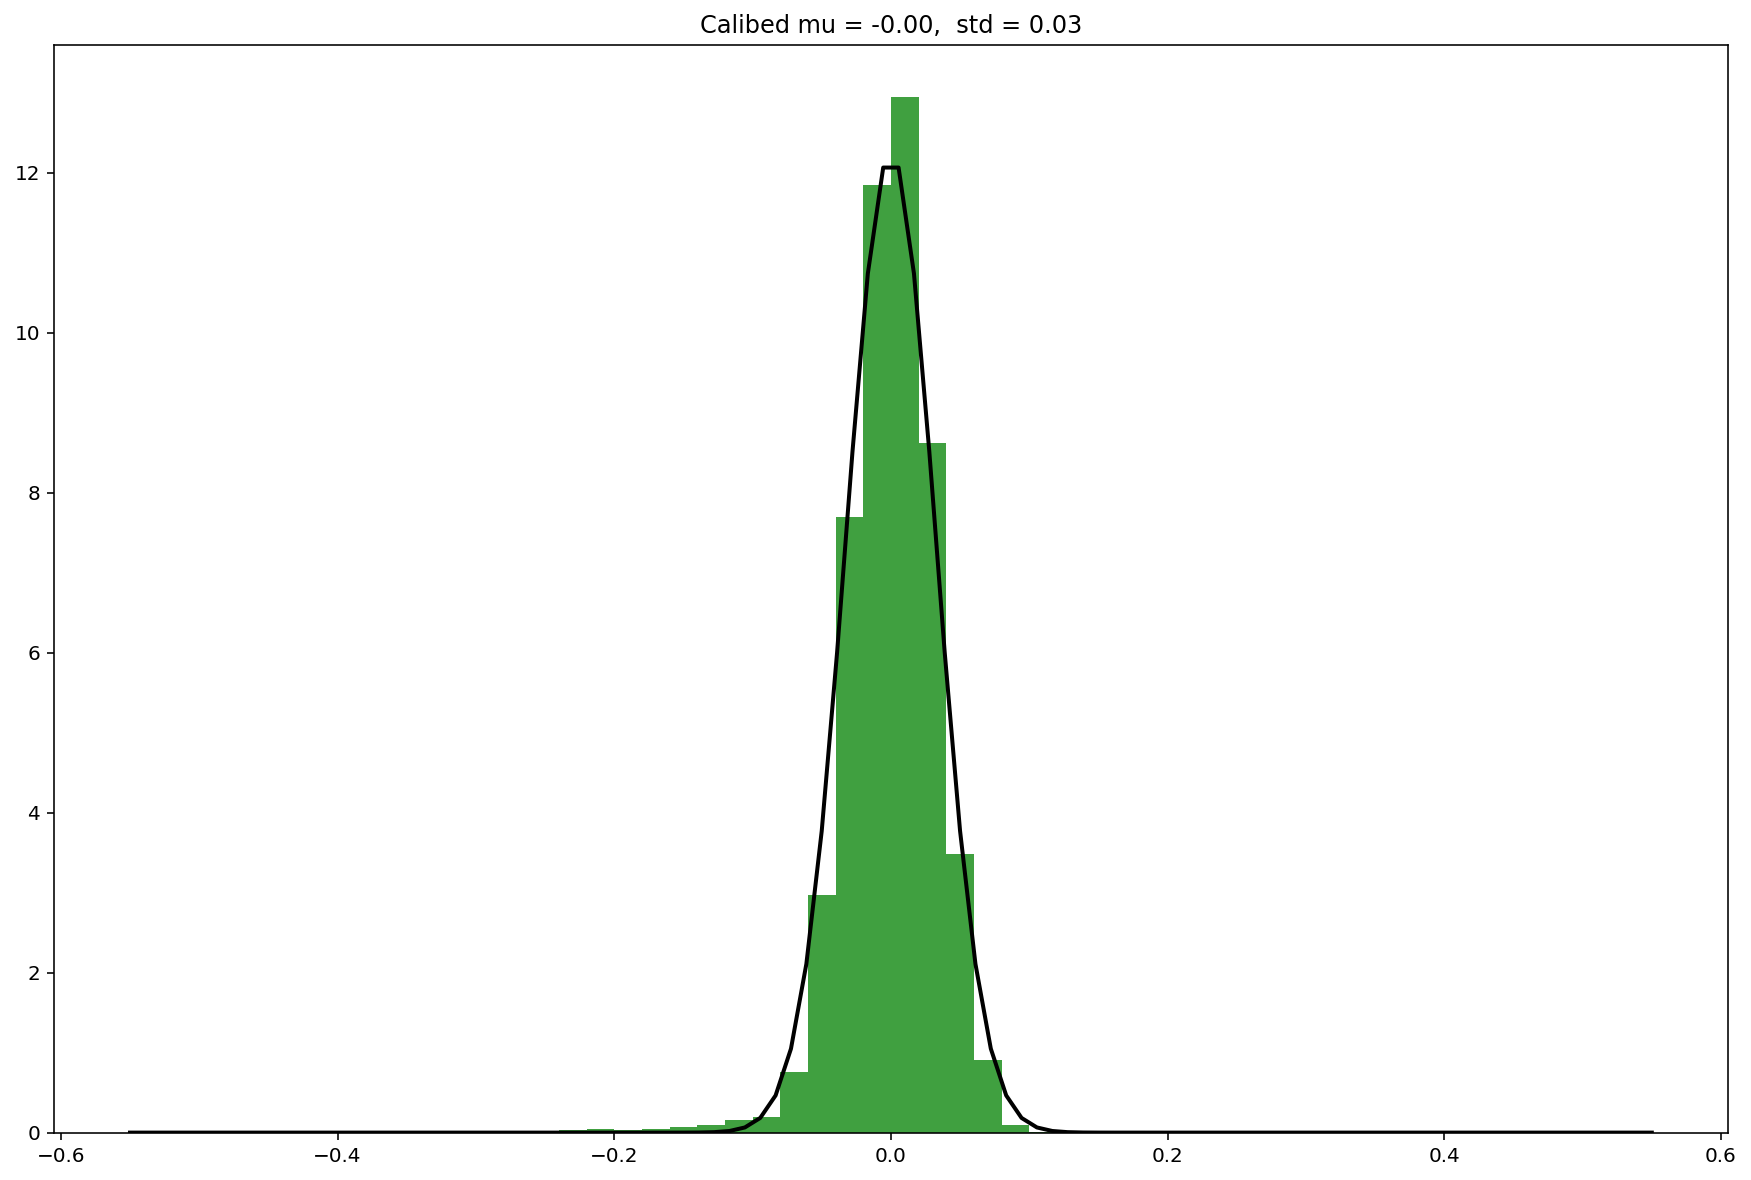

In [17]:
plt.close("all") 
distance_calib = {
    1: {}
}
distances = read_distances_swarm_frame(bag, "/swarm_drones/swarm_frame", t0)

plot_distance_err(poses, poses_fused, distances, main_id, nodes, distance_calib[main_id], is_show=True)

Outlier rate 0.48% total loops 207 inter_loops 239 outlier_num 1
Pos cov 8.4e-04, 2.3e-03, 9.9e-04
Yaw cov 2.5e-03
Pos std 2.9e-02, 4.8e-02, 3.1e-02
Yaw std 5.0e-02


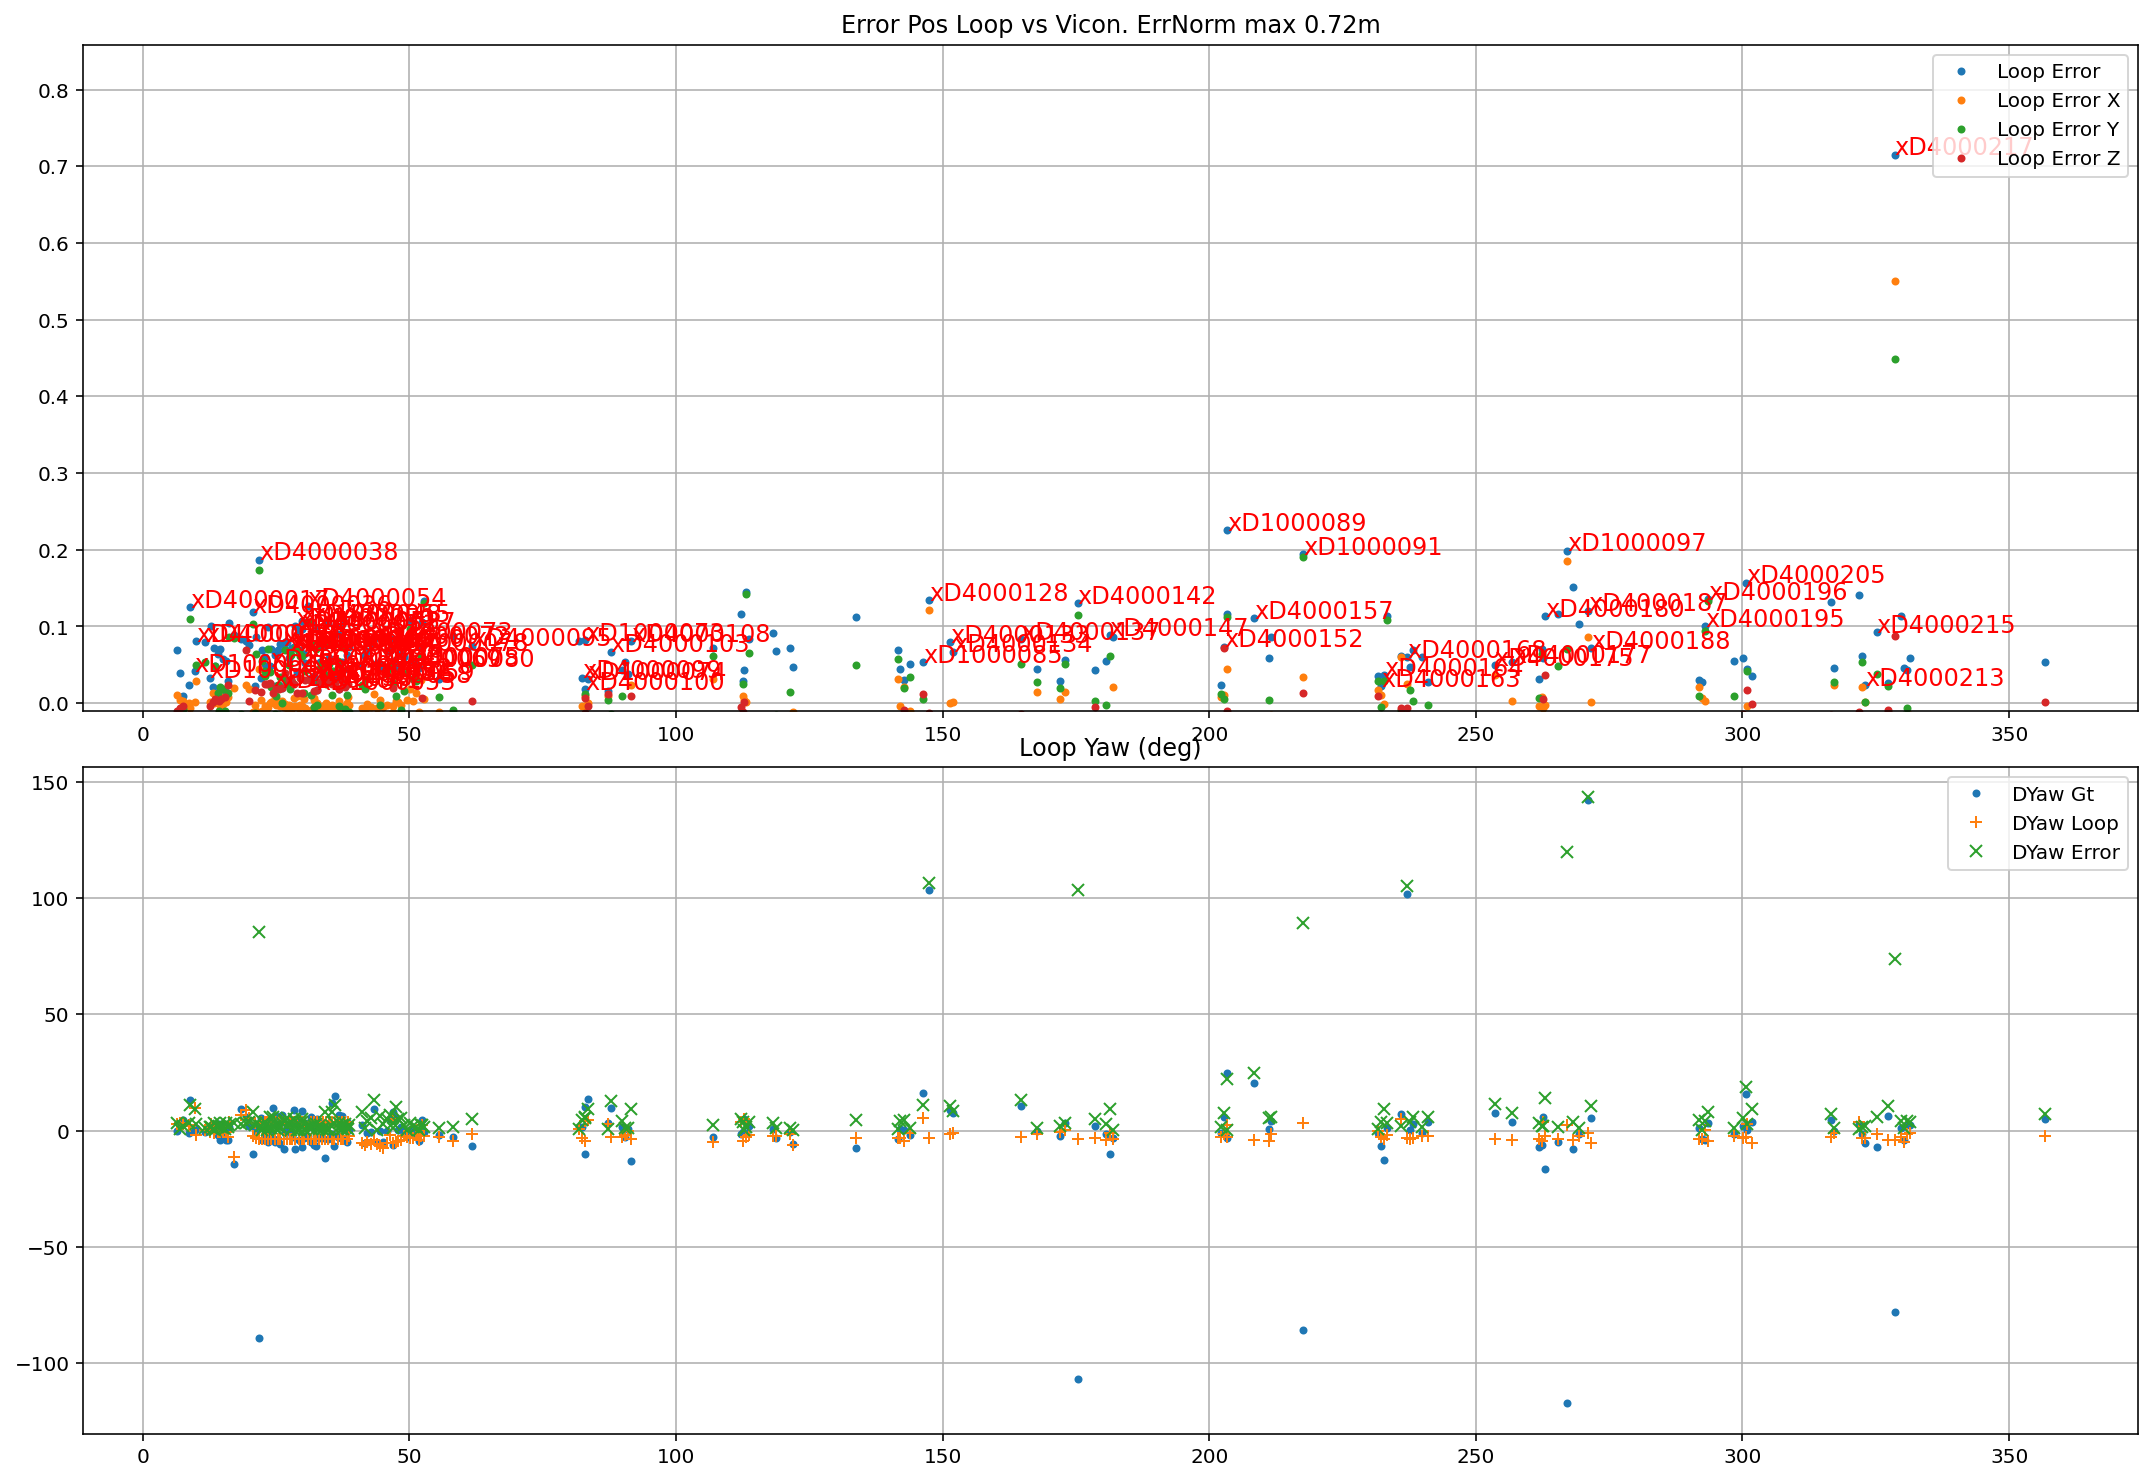

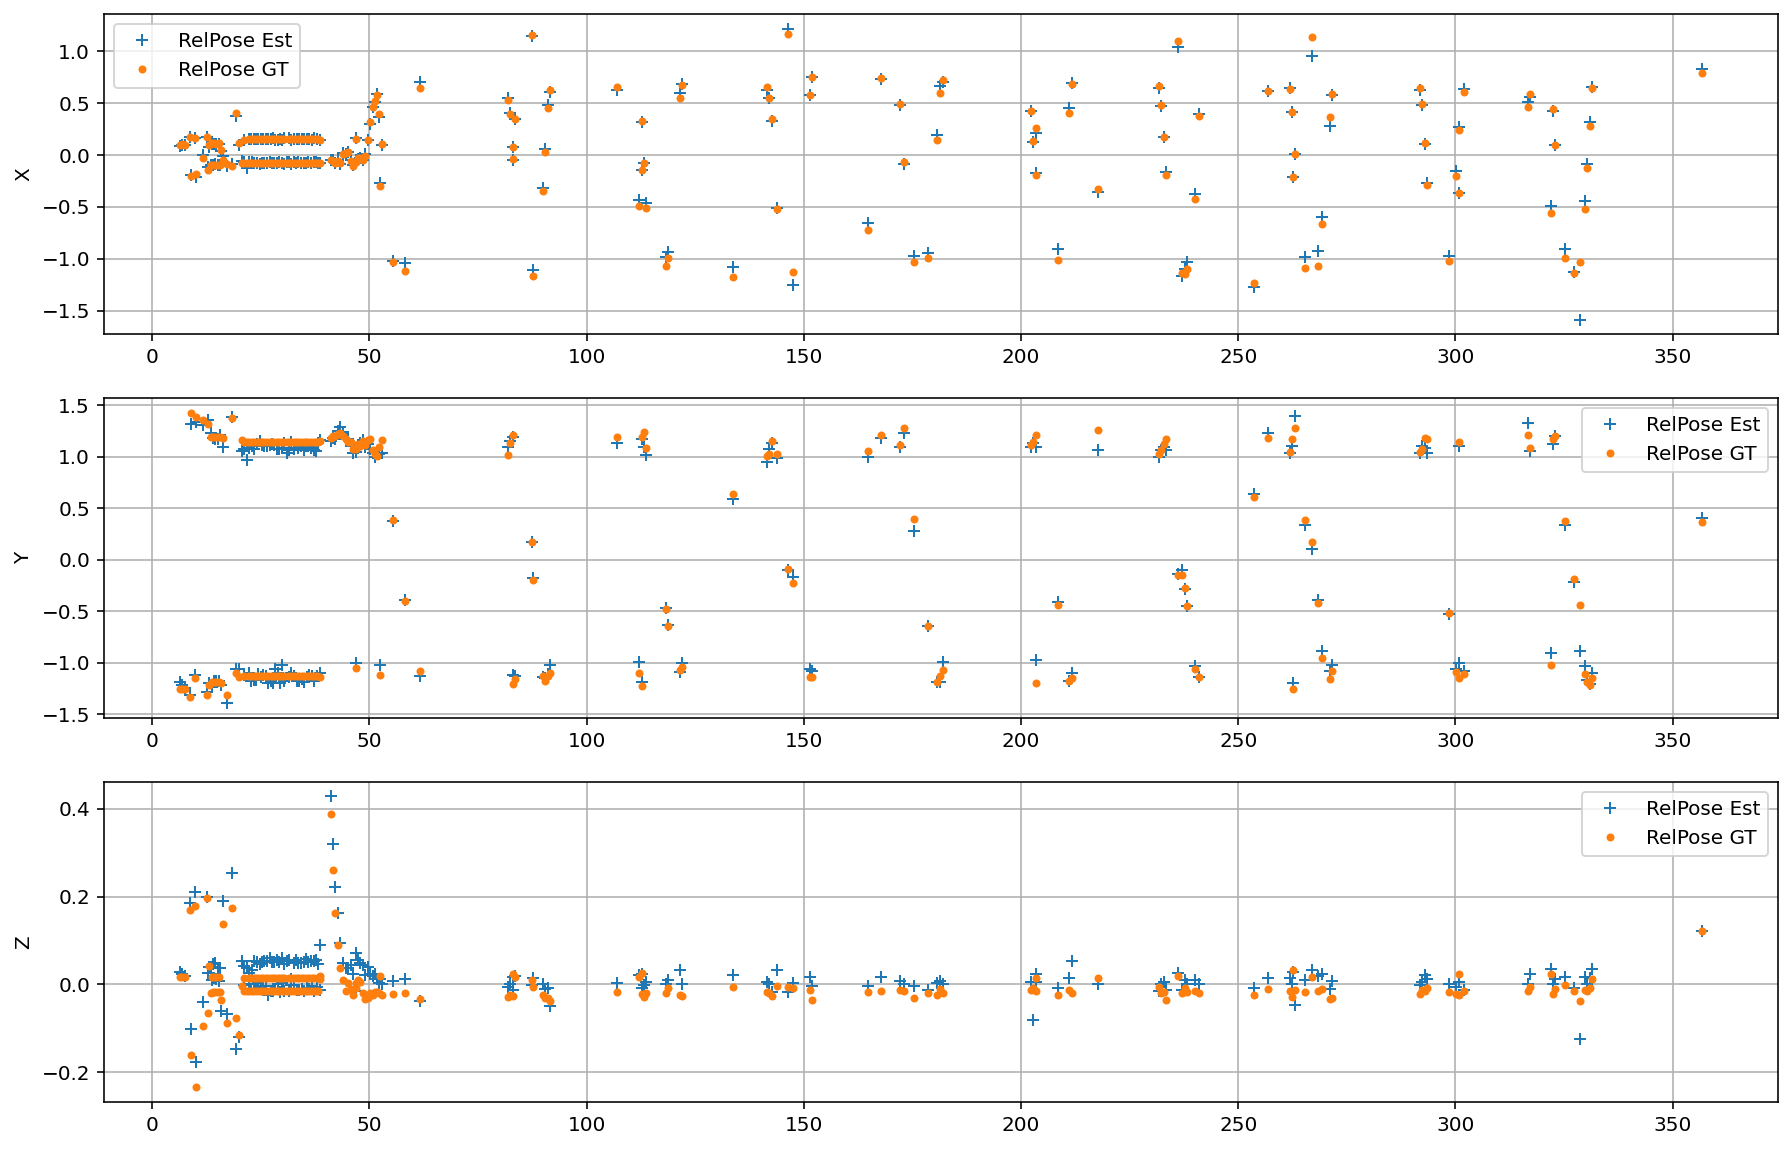

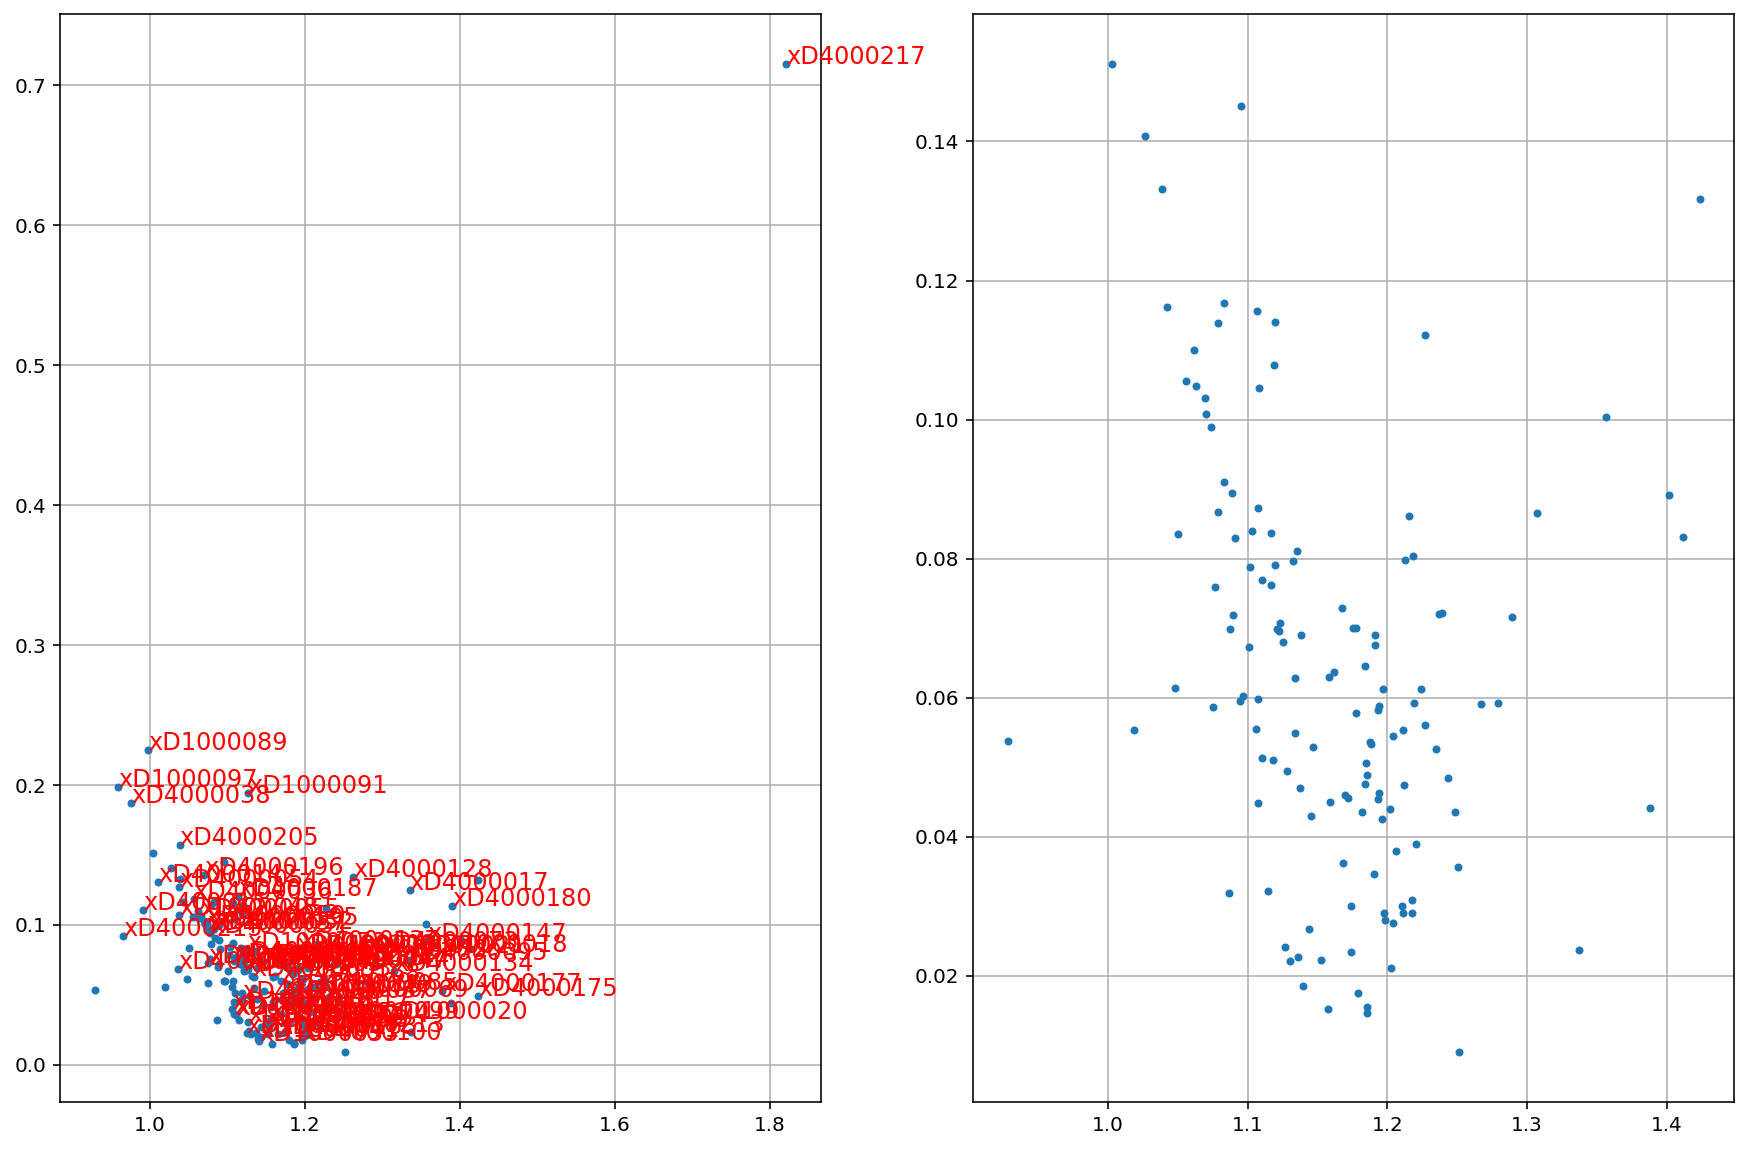

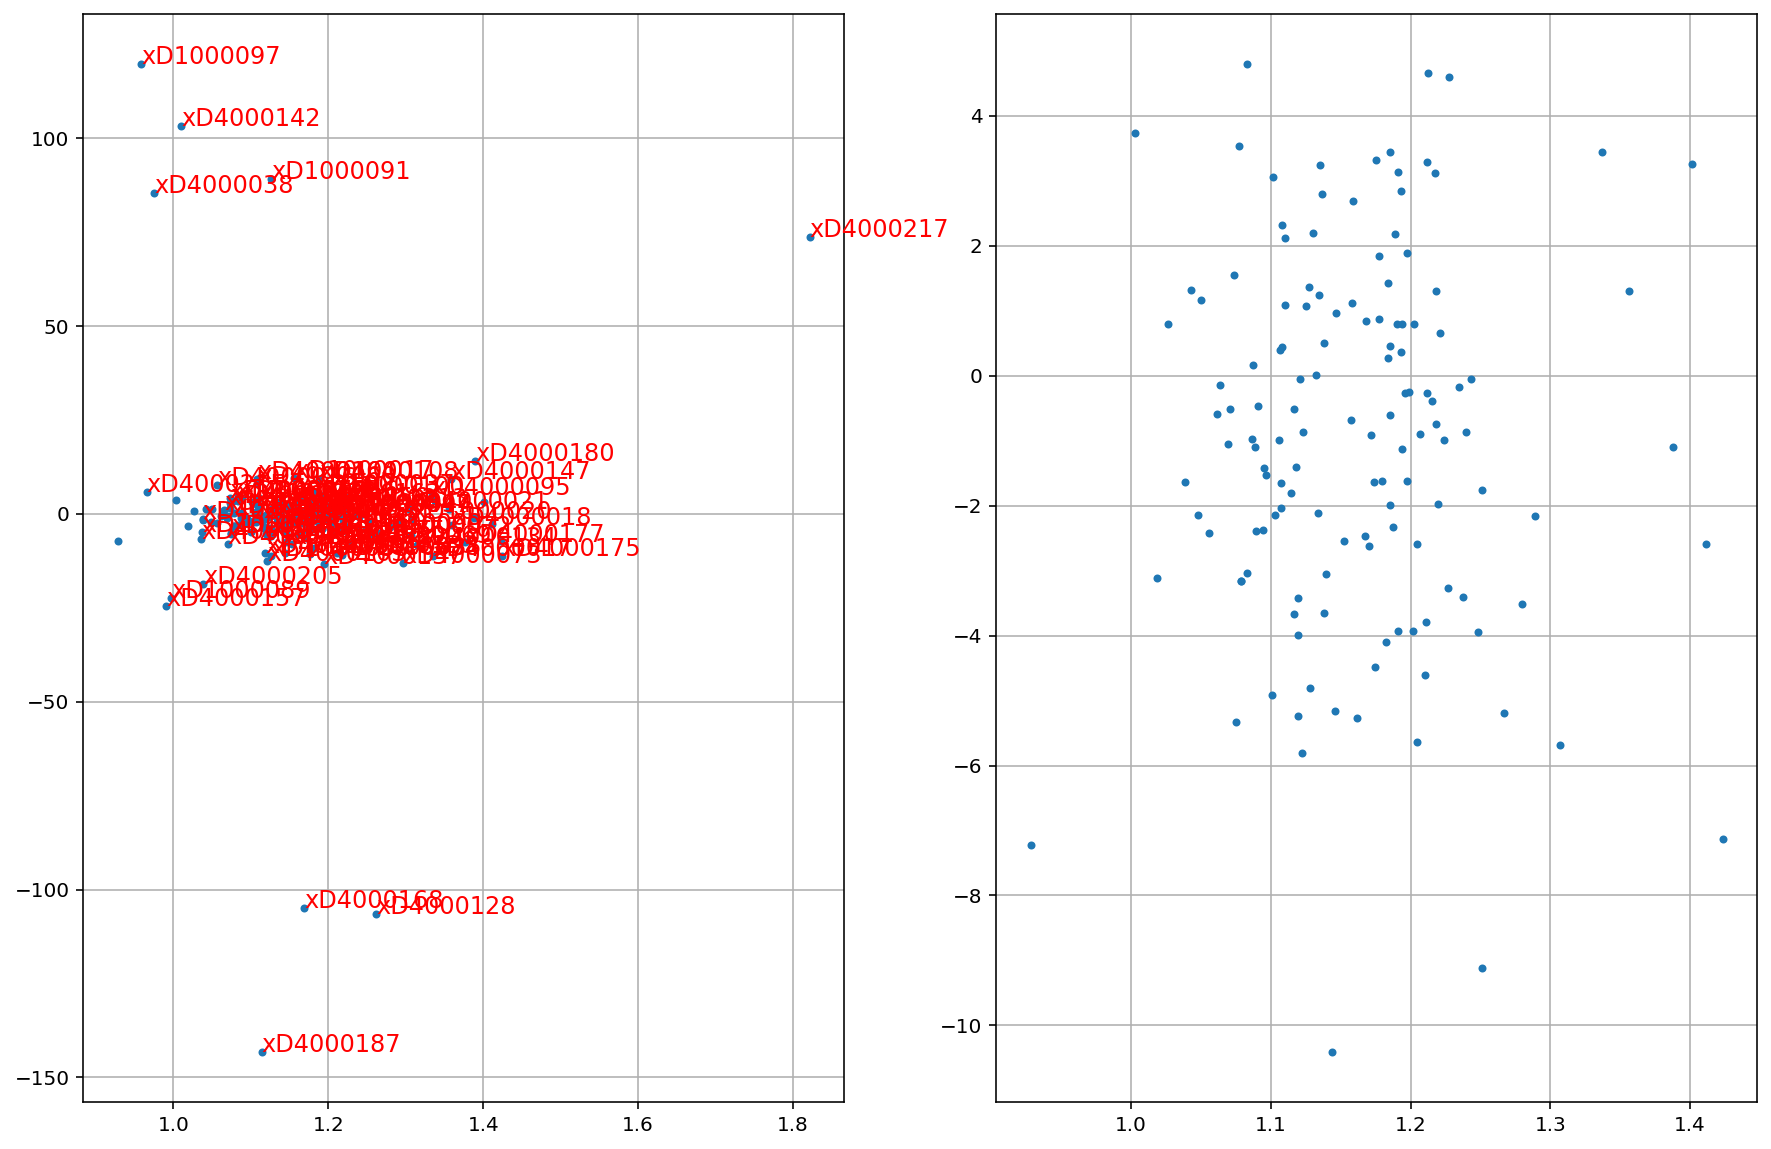

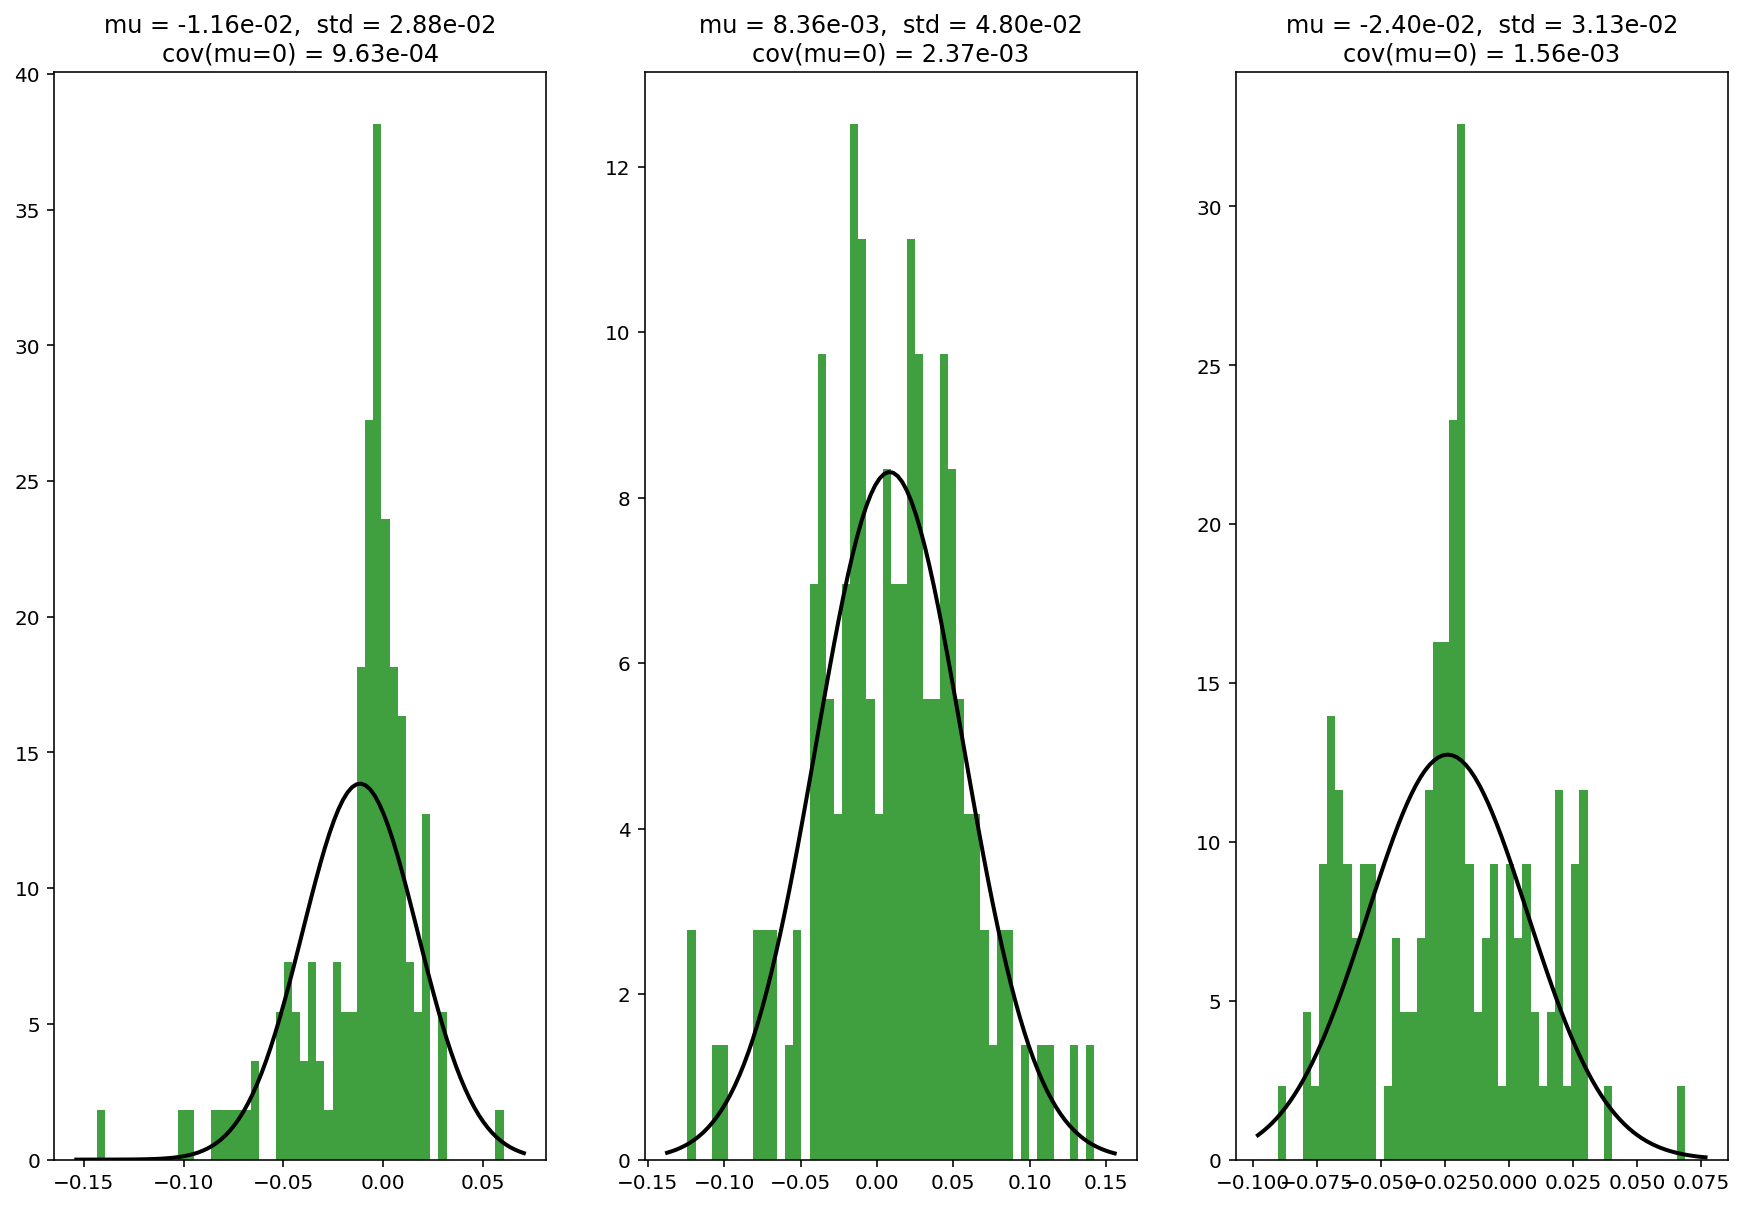

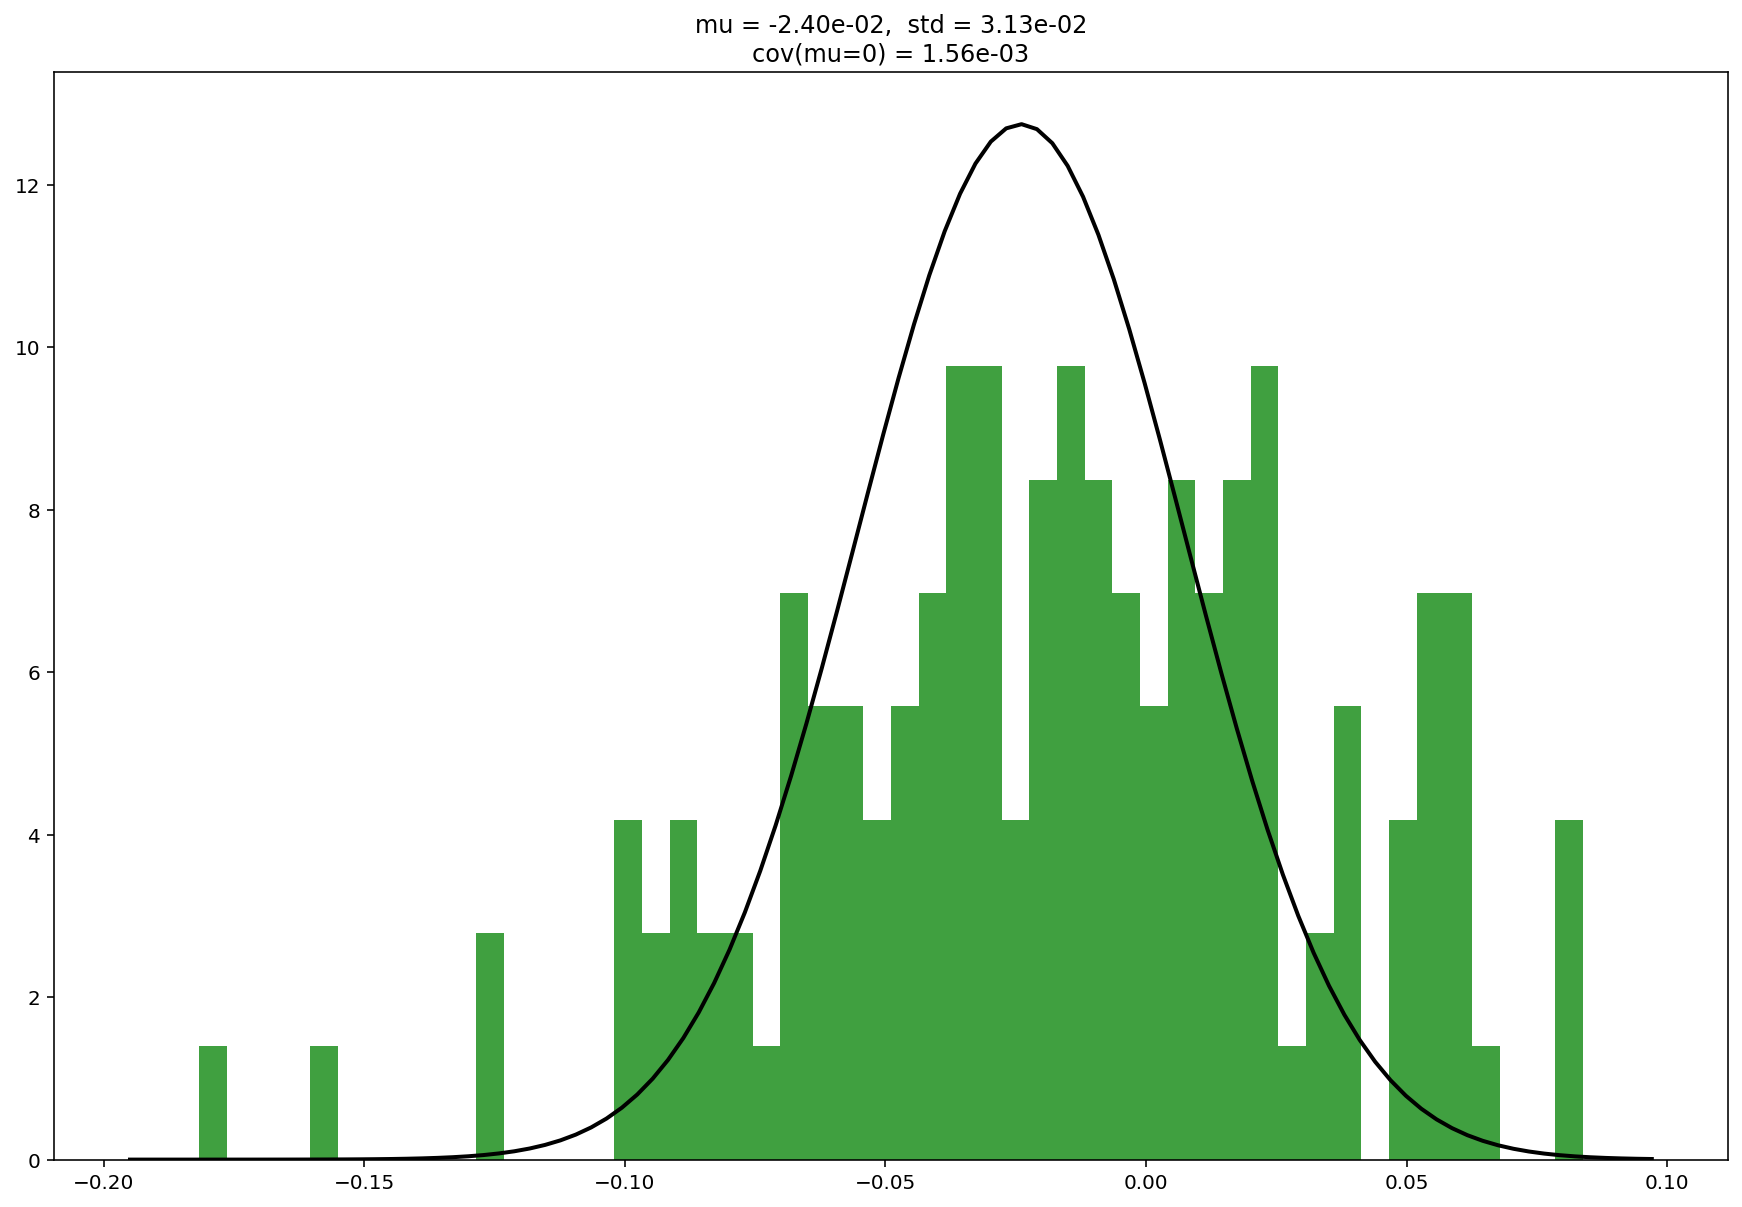

In [30]:
plt.close("all")
inliers = read_loop_inliers(bag, "/swarm_drones/loop_inliers")
detections = read_detections_6d(bag, t0, "/swarm_drones/node_detected_6d")
loops_error =  plot_loops_error(poses, detections, inliers[-1], outlier_show_thres=10)
# loops_error =  plot_loops_error(poses, detections, None)


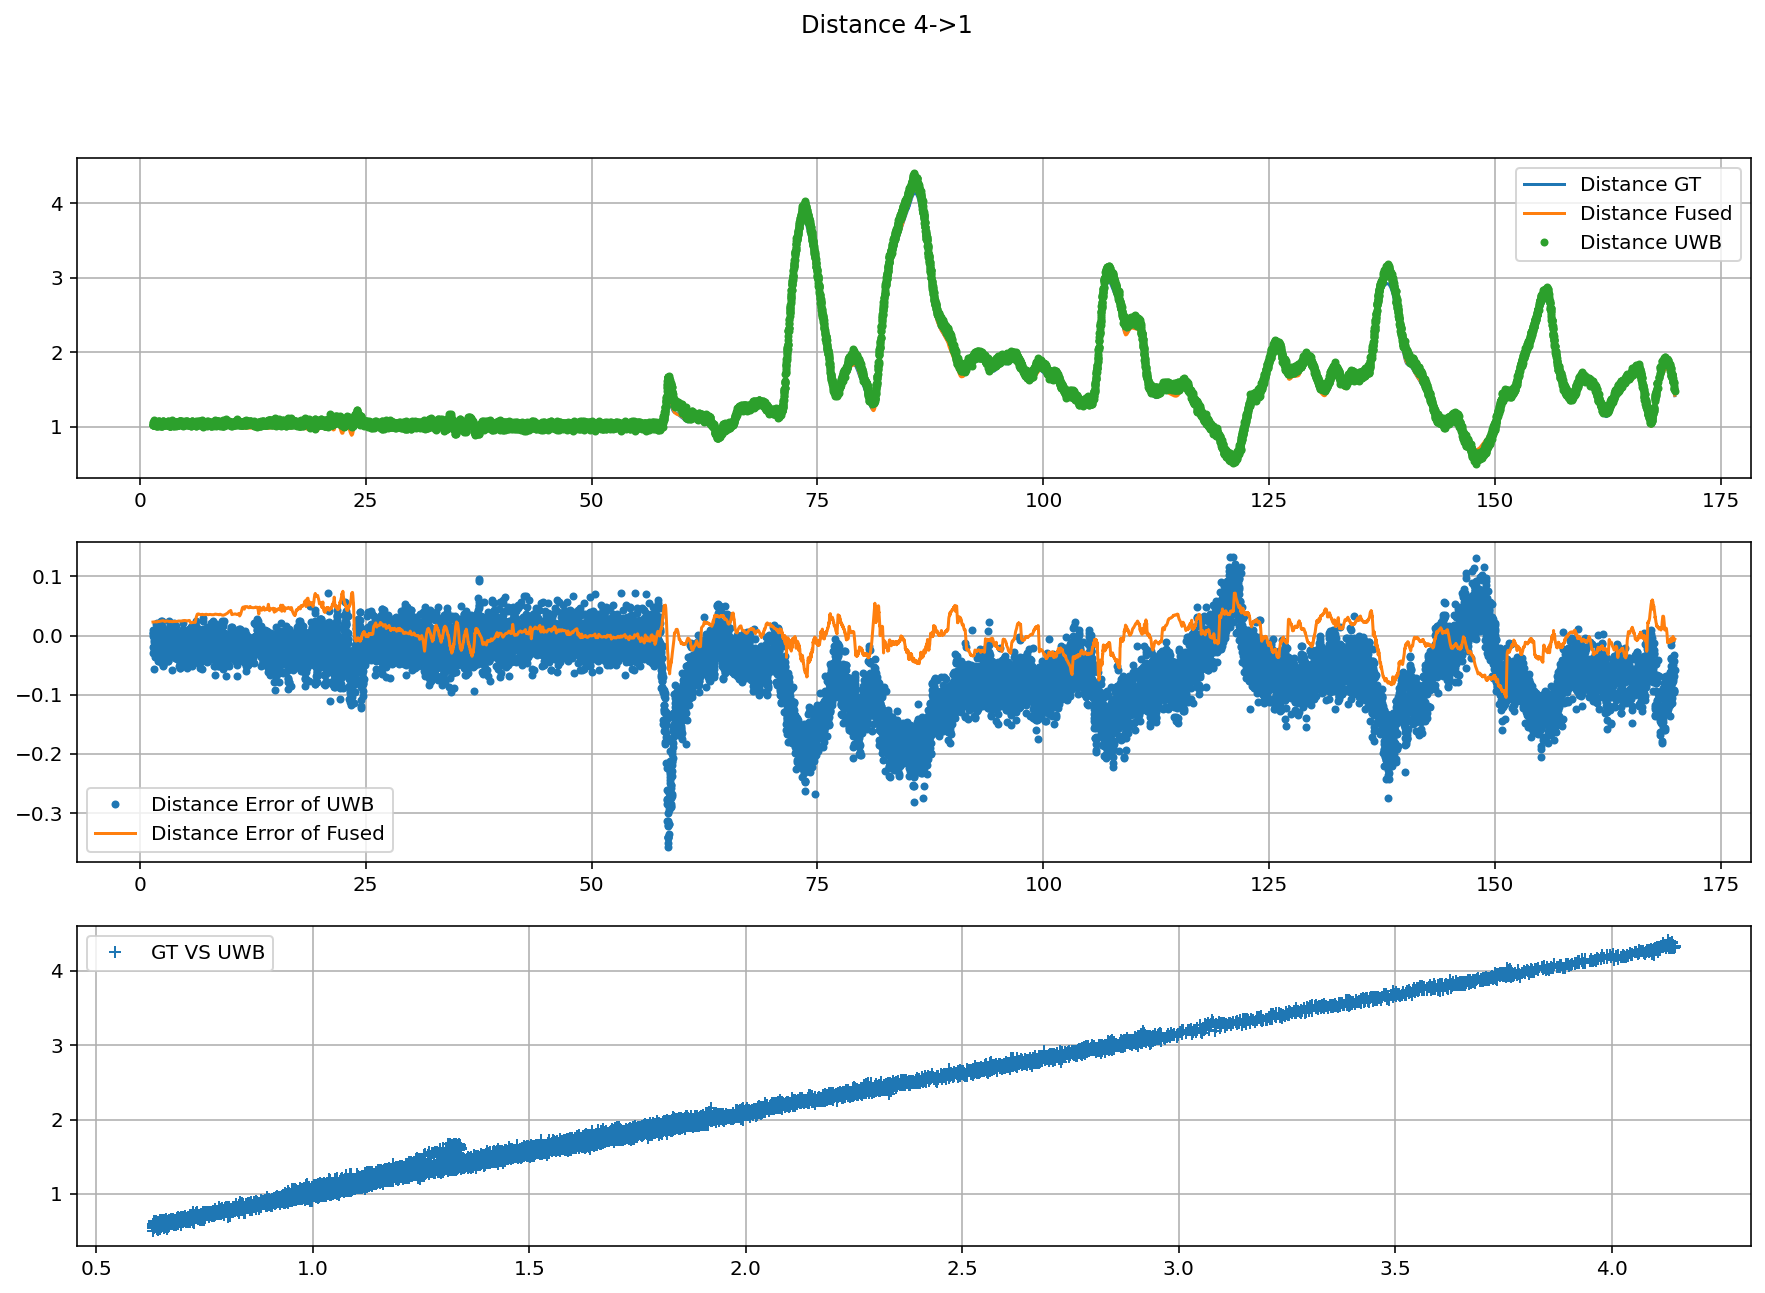

Distance 4->1 RMSE 0.08304803605693456
Use fit 0.9499422747931782, 0.002876024957717875
Cov Fitted 0.0014094364404298148
Cov Raw 0.0036360419215952407


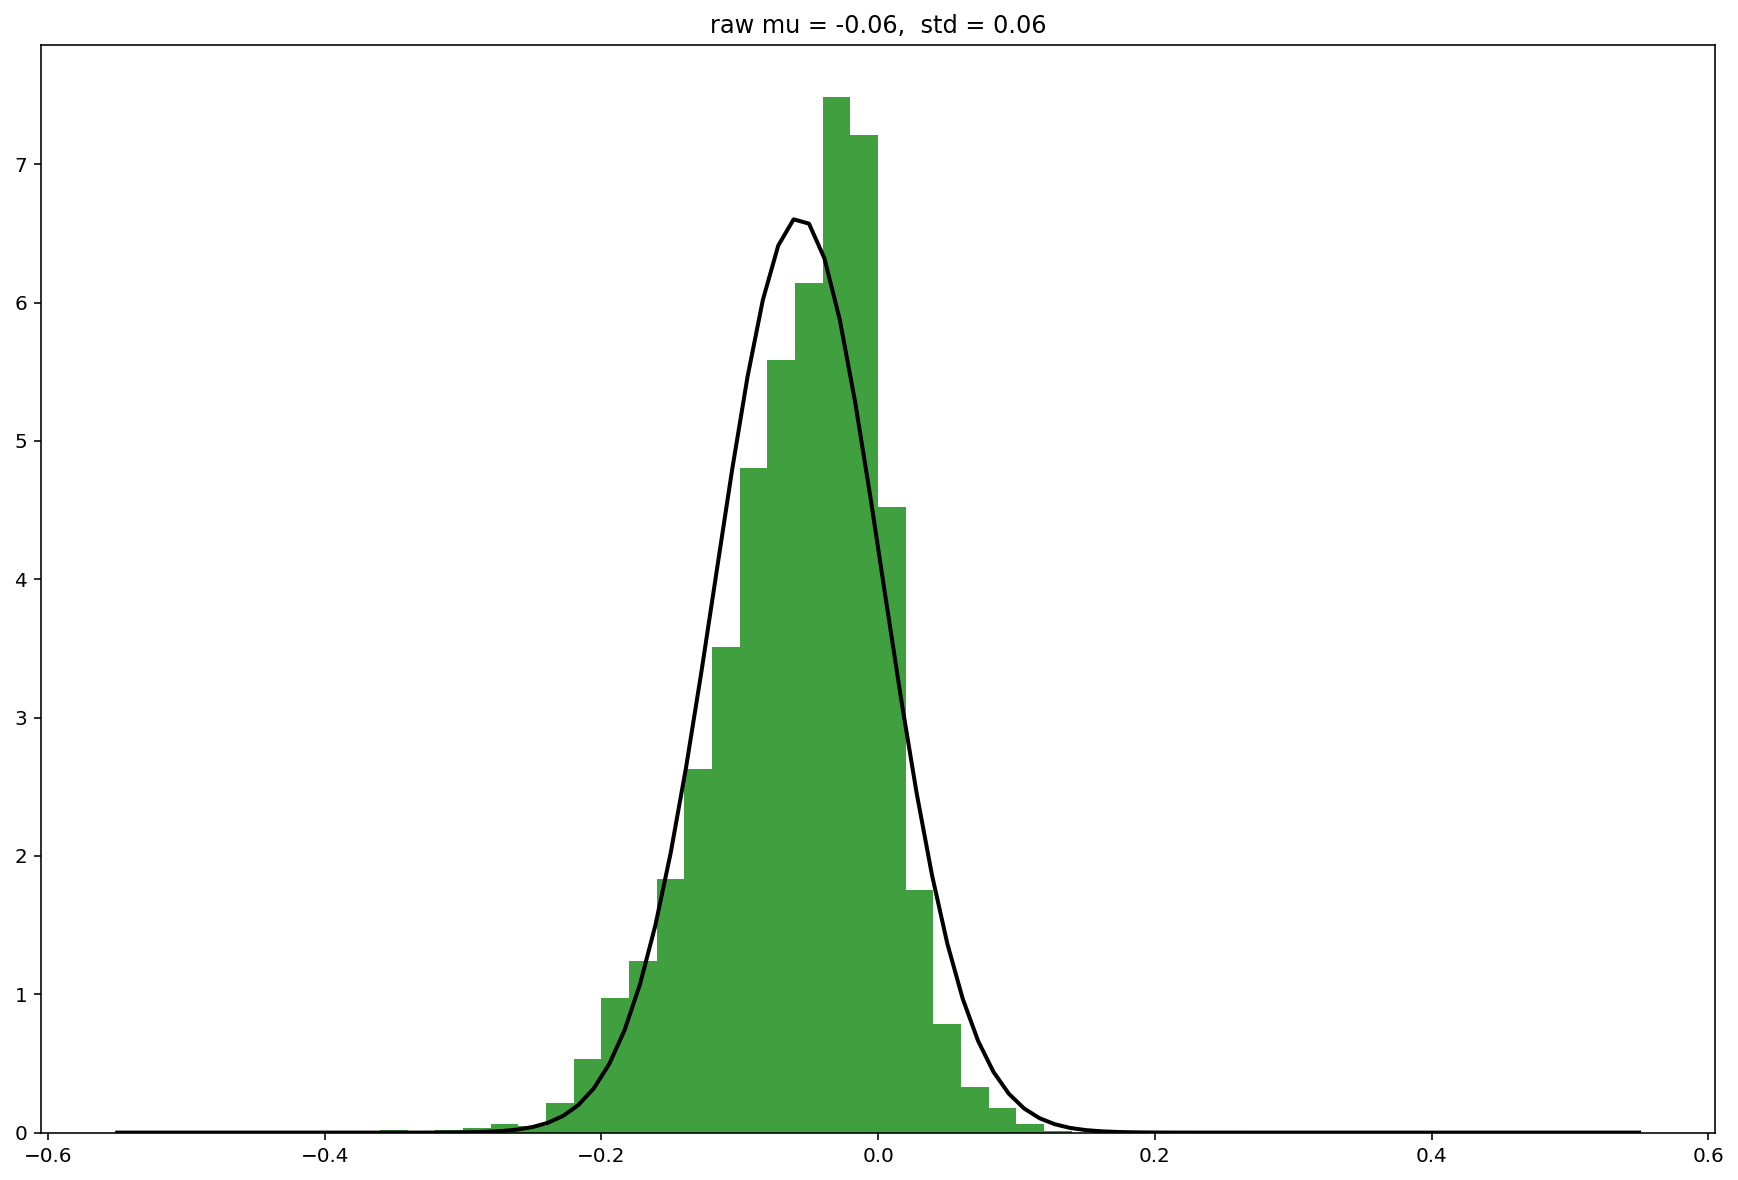

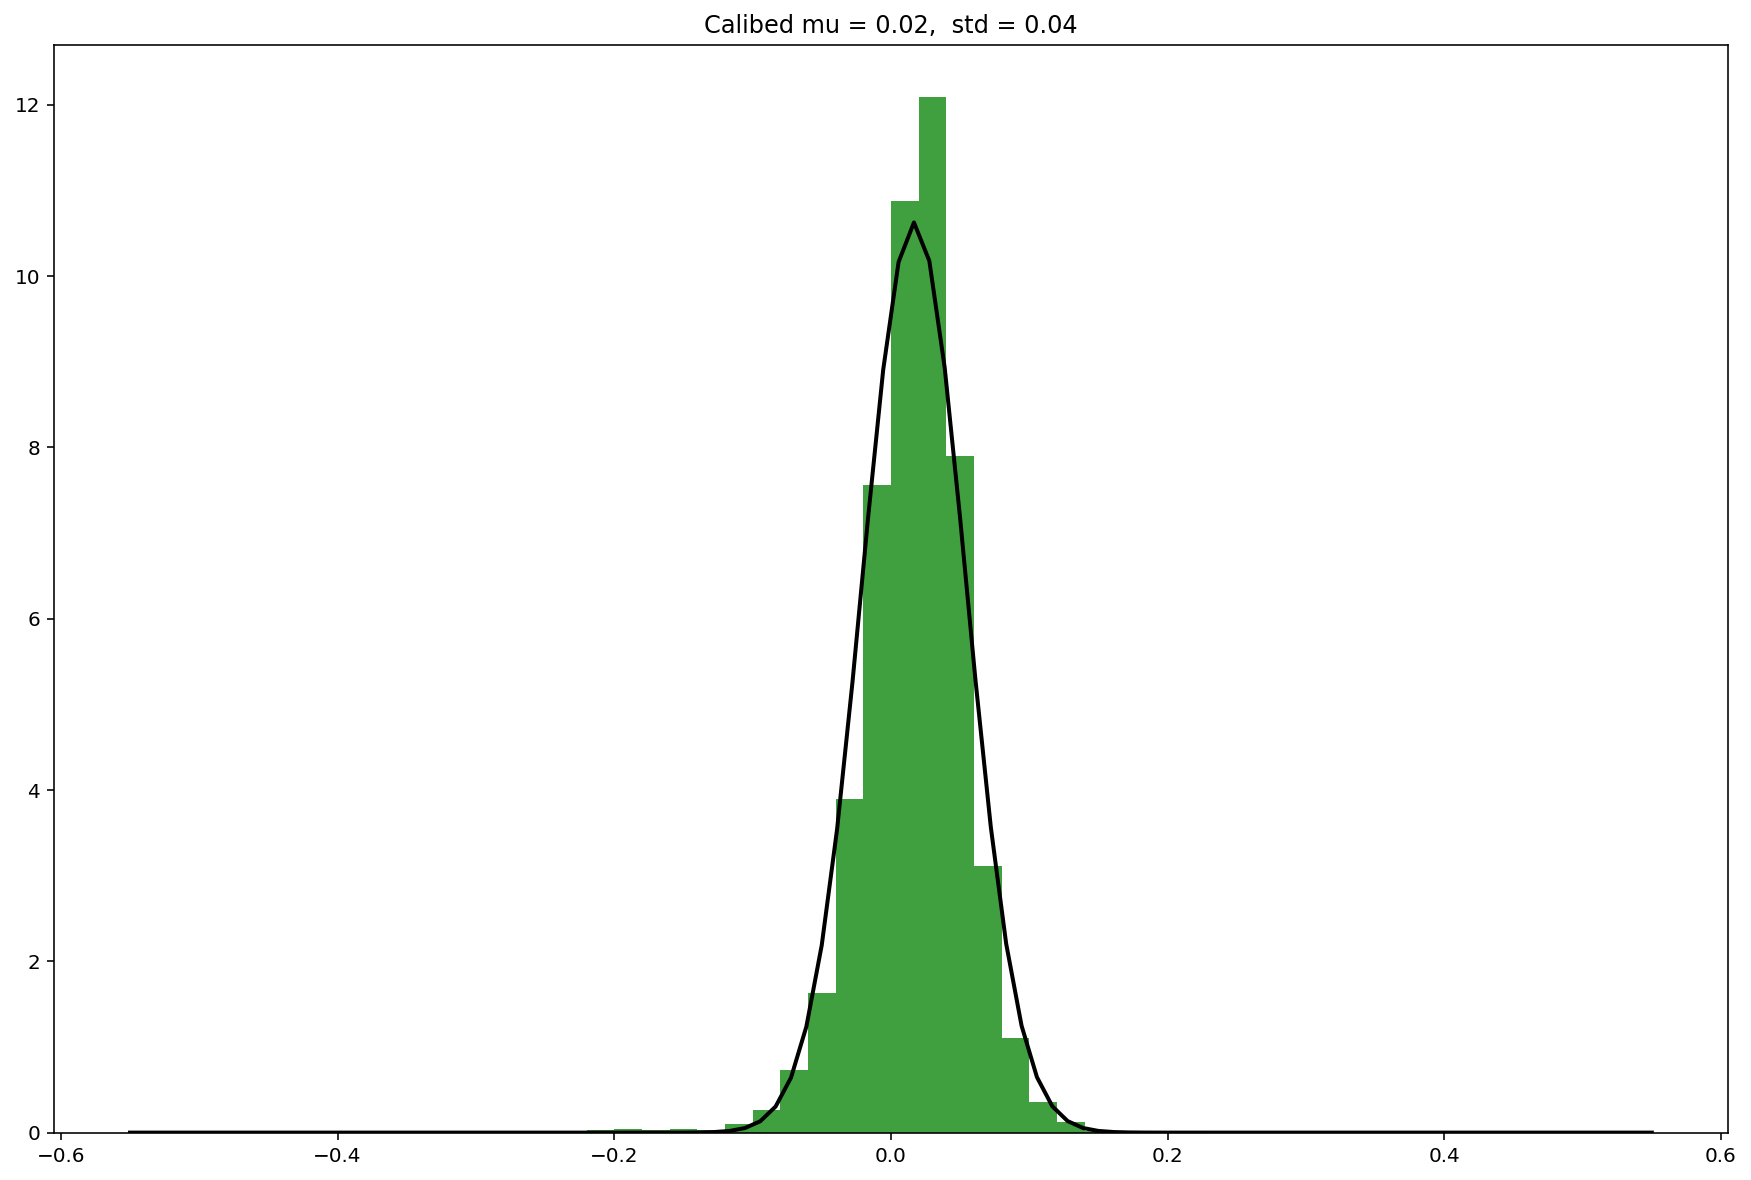

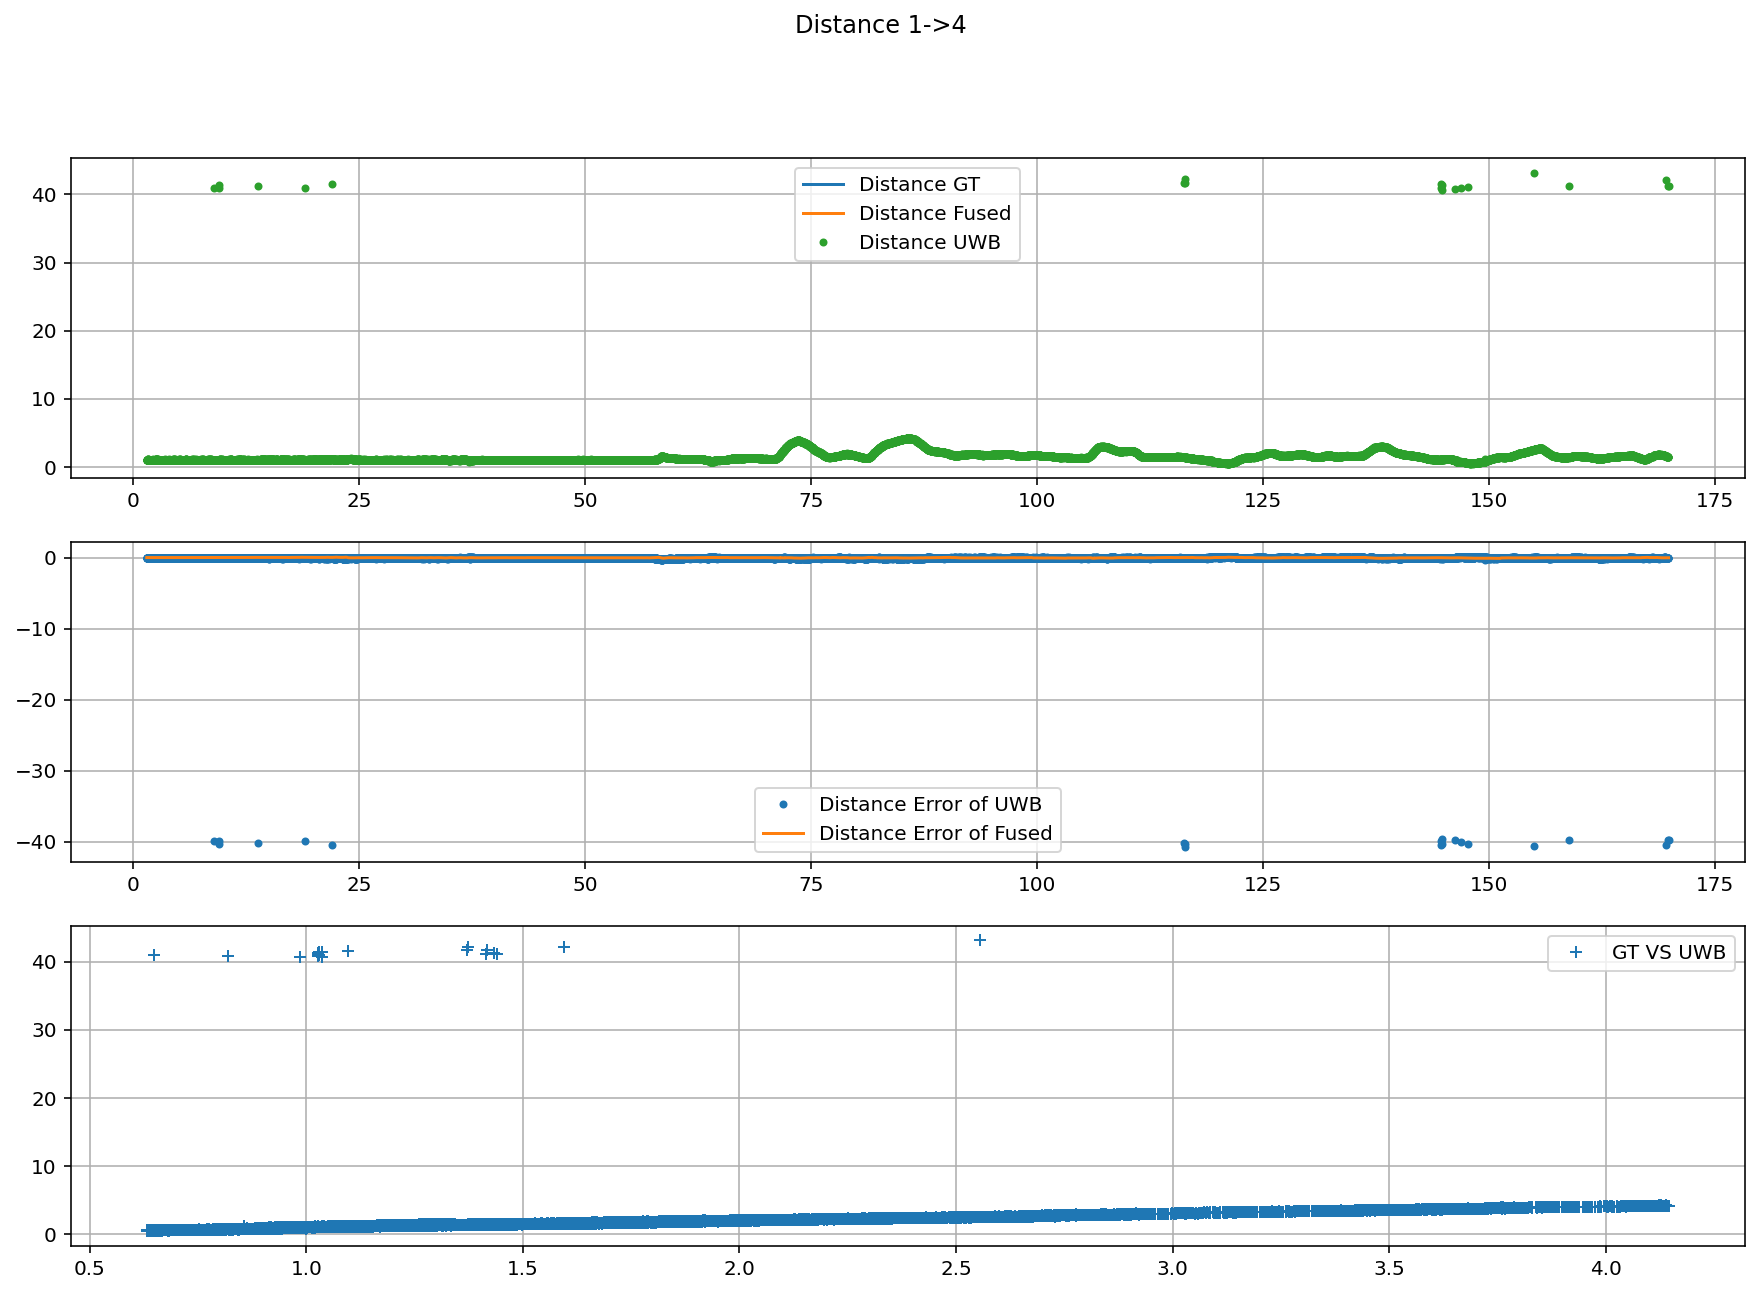

Distance 1->4 RMSE 1.4435003587732953
Fit 0.1697747663767527, 1.2095928277485708
Cov Fitted 0.11907543613223144
Cov Raw 2.0758994905046717


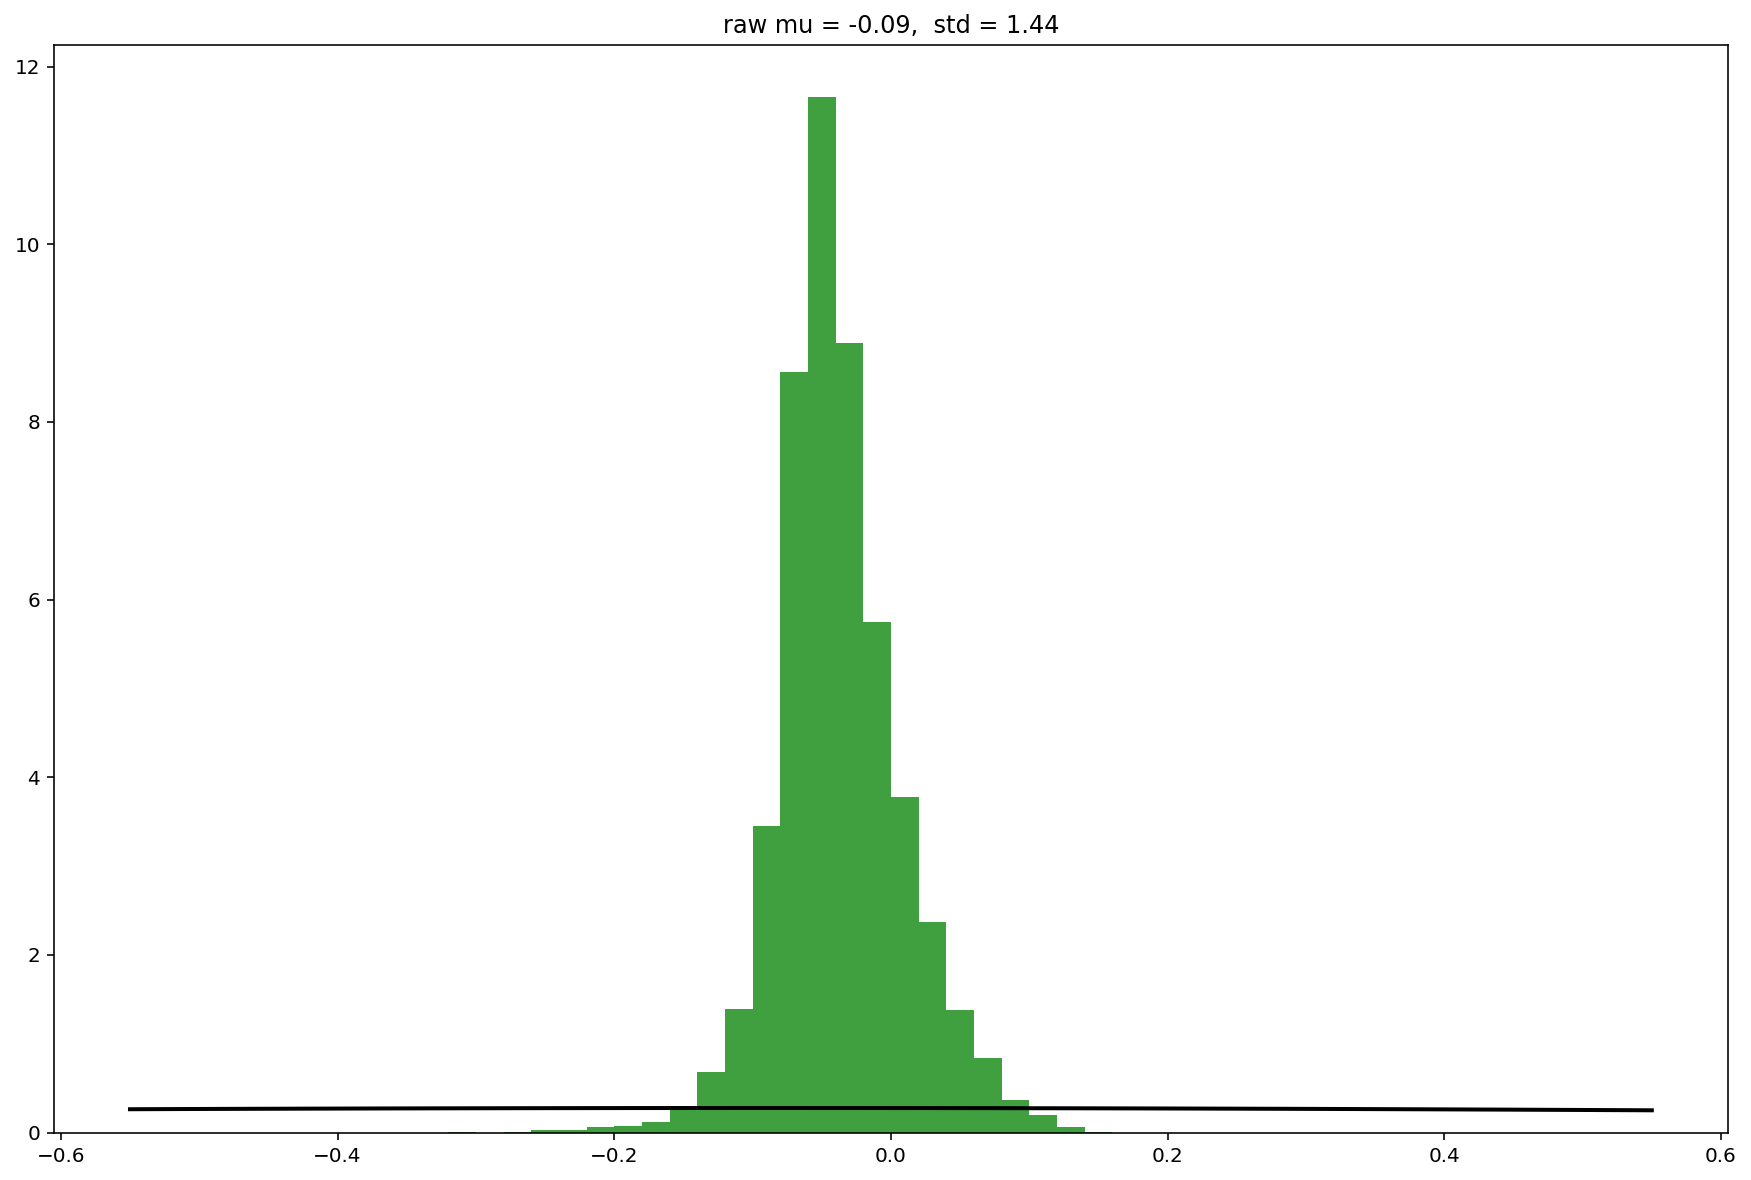

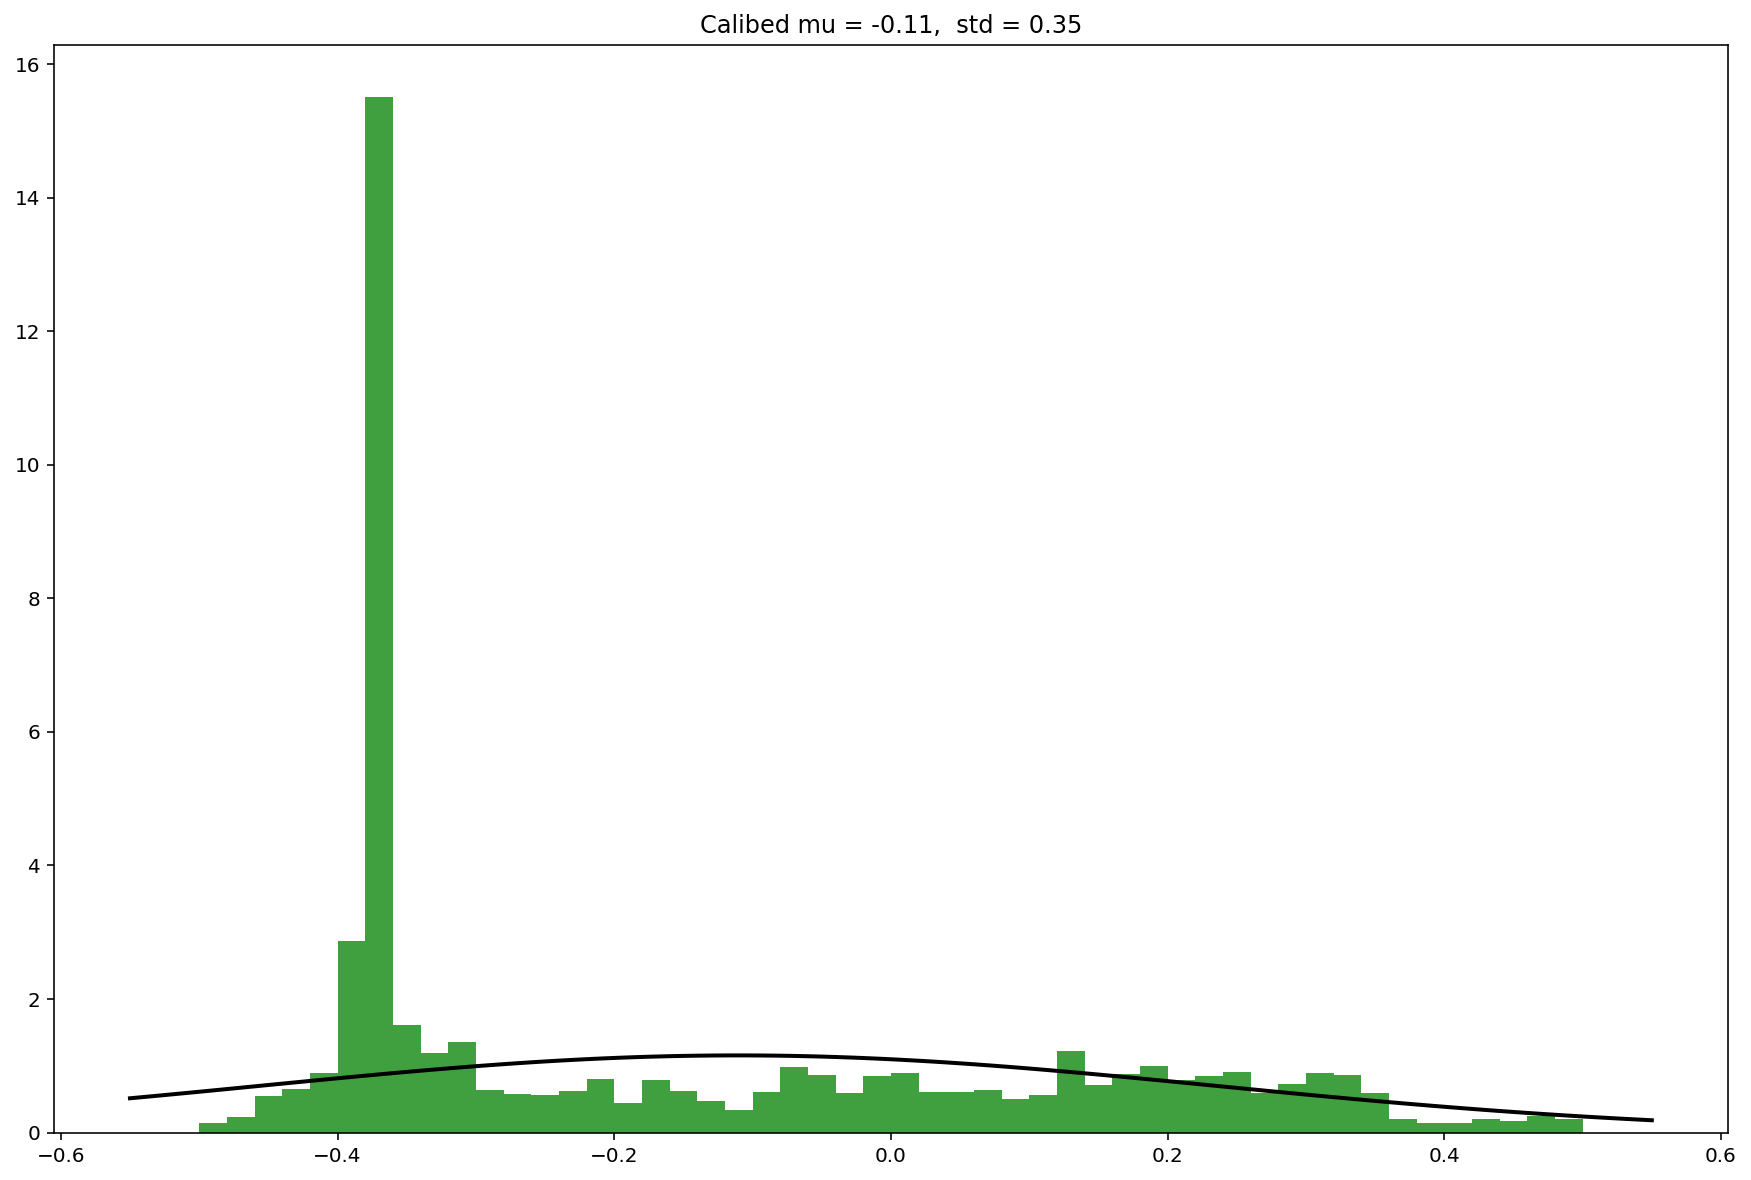

In [6]:
plt.close("all") 
distances = read_distances_swarm_frame(bag, "/swarm_drones/swarm_frame", t0)
calib = {
    4: [ 0.9499422747931782, 0.002876024957717875]
}
#plot_distance_err(poses, poses_fused, distances, main_id, nodes, is_show=True)
plot_distance_err(poses, poses_fused, distances, main_id, nodes, is_show=True, calib=calib)
